In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [ ]:
samples/opensora/A vibrant underwater scene. A group of b_spatial_mlp_mse.pt
samples/opensora/A vibrant underwater scene. A group of b_temporal_mlp_mse.pt

In [2]:
import torch


spatial_mlp_mse = torch.load('samples/opensora/A vibrant underwater scene. A group of b_spatial_mlp_mse.pt')
temporal_mlp_mse = torch.load('samples/opensora/A vibrant underwater scene. A group of b_temporal_mlp_mse.pt')

print(spatial_mlp_mse)
print(temporal_mlp_mse)

{984: [(0, 0.0007480465574190021), (1, 0.0016909644473344088), (2, 0.03707685321569443), (3, 0.015416021458804607), (4, 0.013310241512954235), (5, 0.031003203243017197), (6, 0.030530454590916634), (7, 0.04209103435277939), (8, 0.058762919157743454), (9, 0.14305846393108368), (10, 0.30223268270492554), (11, 0.3319234251976013), (12, 0.2813296318054199), (13, 0.19449709355831146), (14, 0.4240092933177948), (15, 0.3323199450969696), (16, 0.4926337003707886), (17, 0.3099495768547058), (18, 0.3128526508808136), (19, 0.2812628746032715), (20, 0.3850579857826233), (21, 0.3949461579322815), (22, 0.47693365812301636), (23, 1.050471305847168), (24, 2.974381685256958), (25, 5.570641994476318), (26, 7.205639839172363), (27, 0.2562864124774933)], 964: [(0, 0.0008385421242564917), (1, 0.0034461484756320715), (2, 0.01269303634762764), (3, 0.006783073302358389), (4, 0.006449173204600811), (5, 0.011907579377293587), (6, 0.02146662399172783), (7, 0.04587716981768608), (8, 0.04305460676550865), (9, 0.105

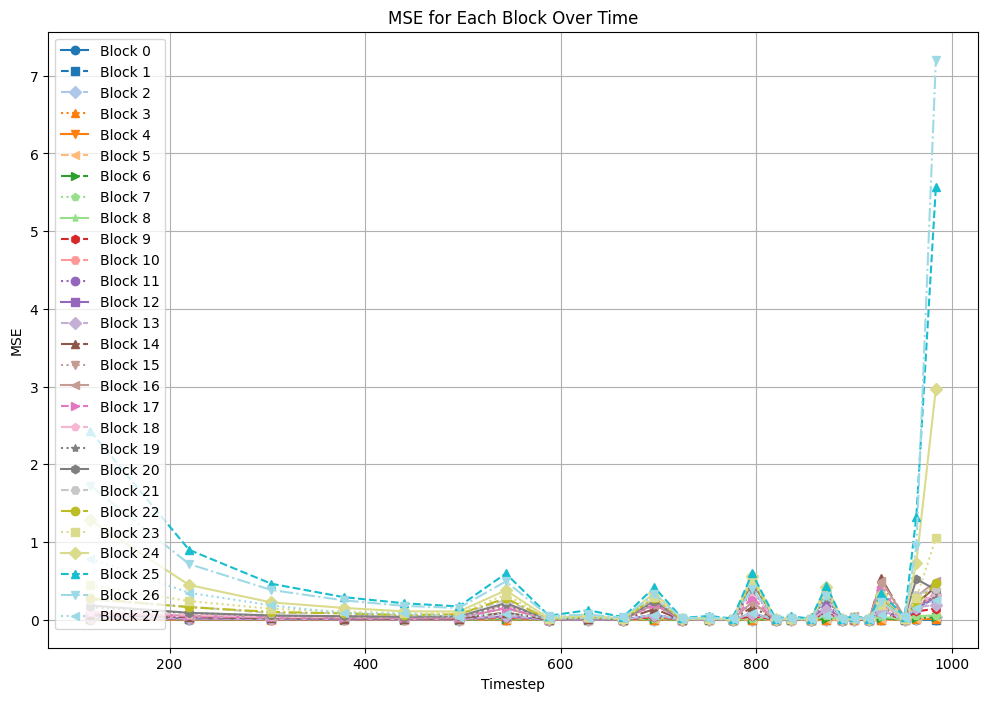

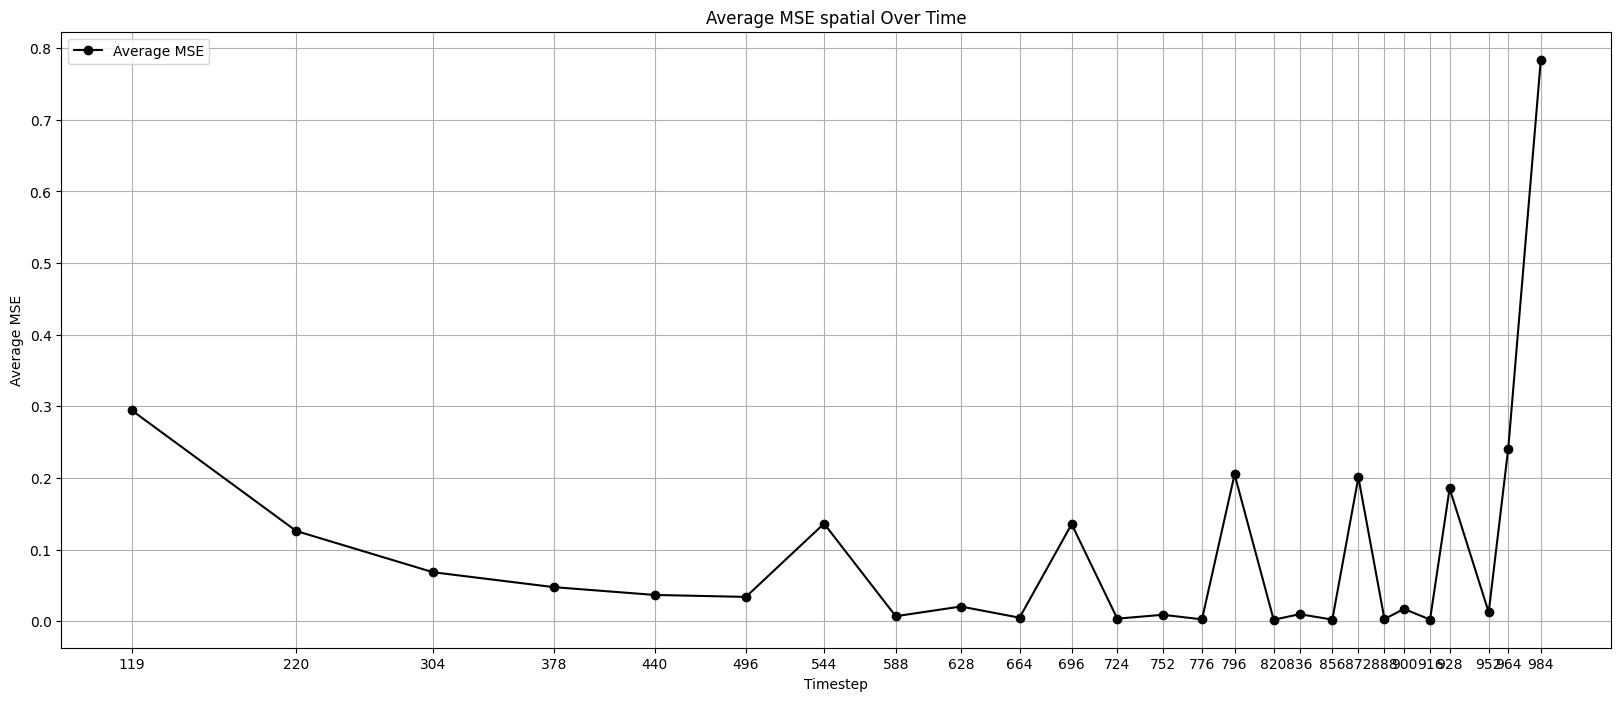

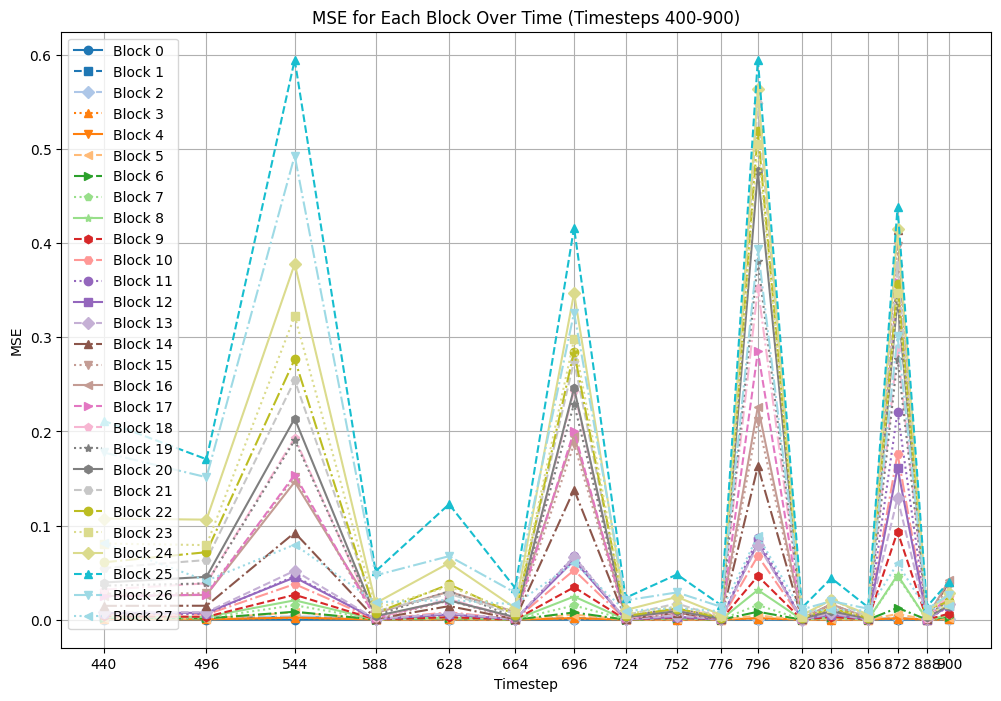

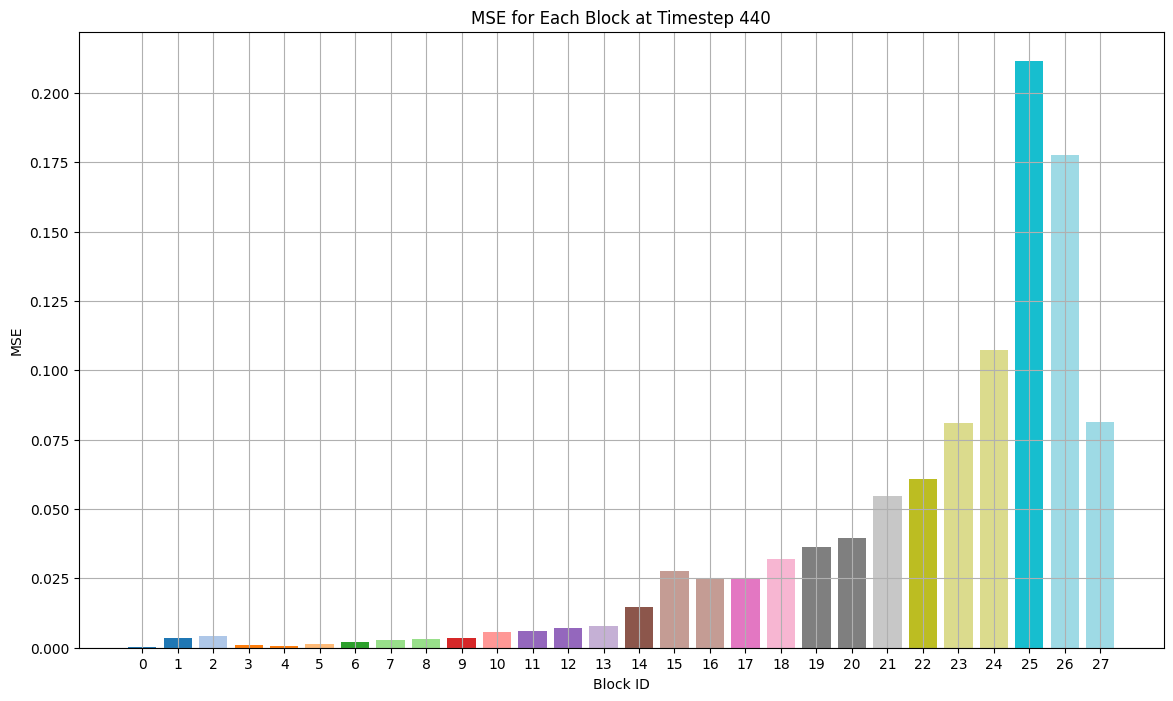

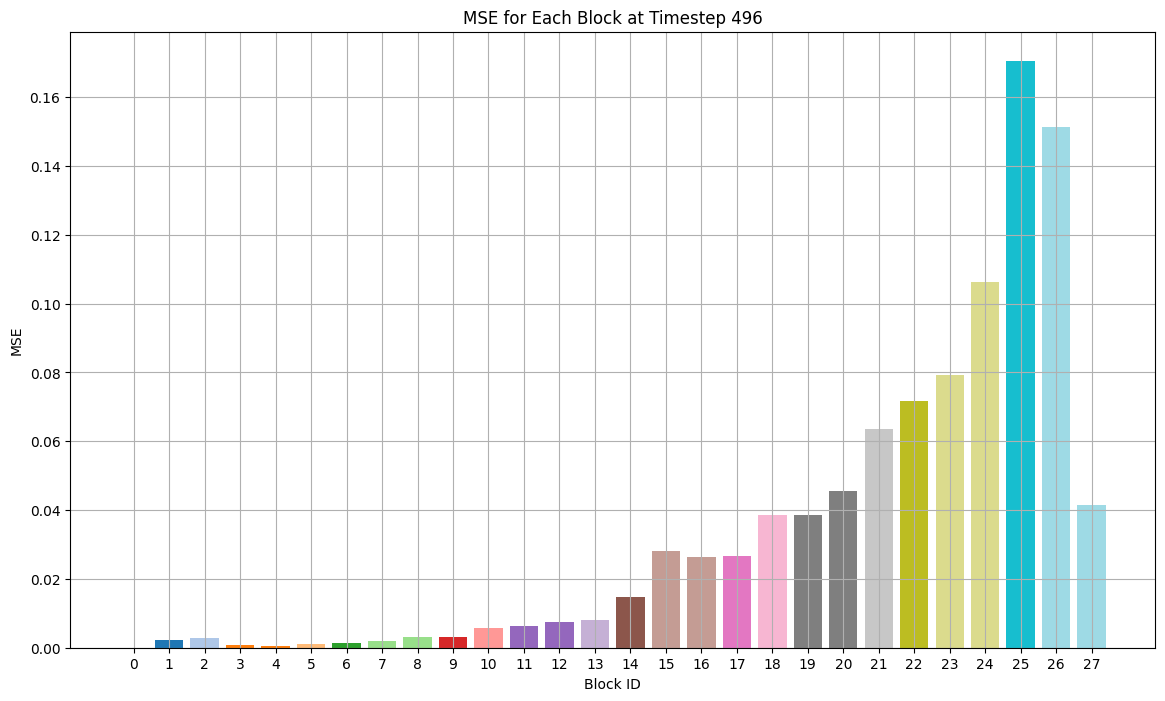

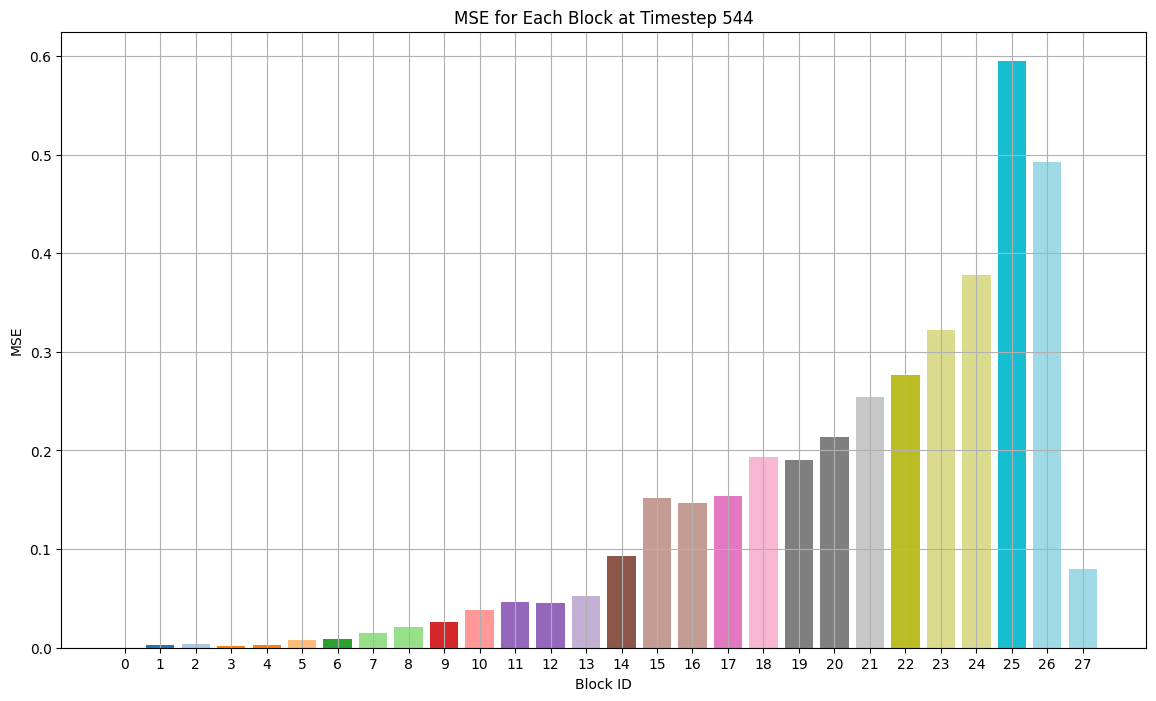

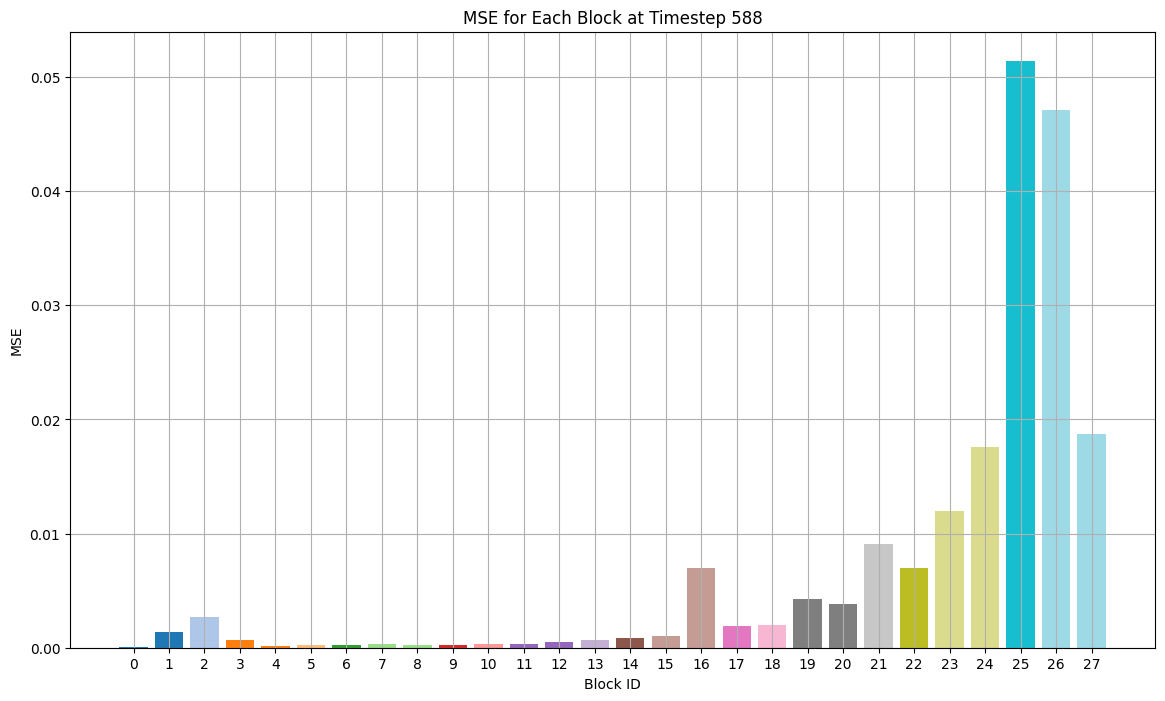

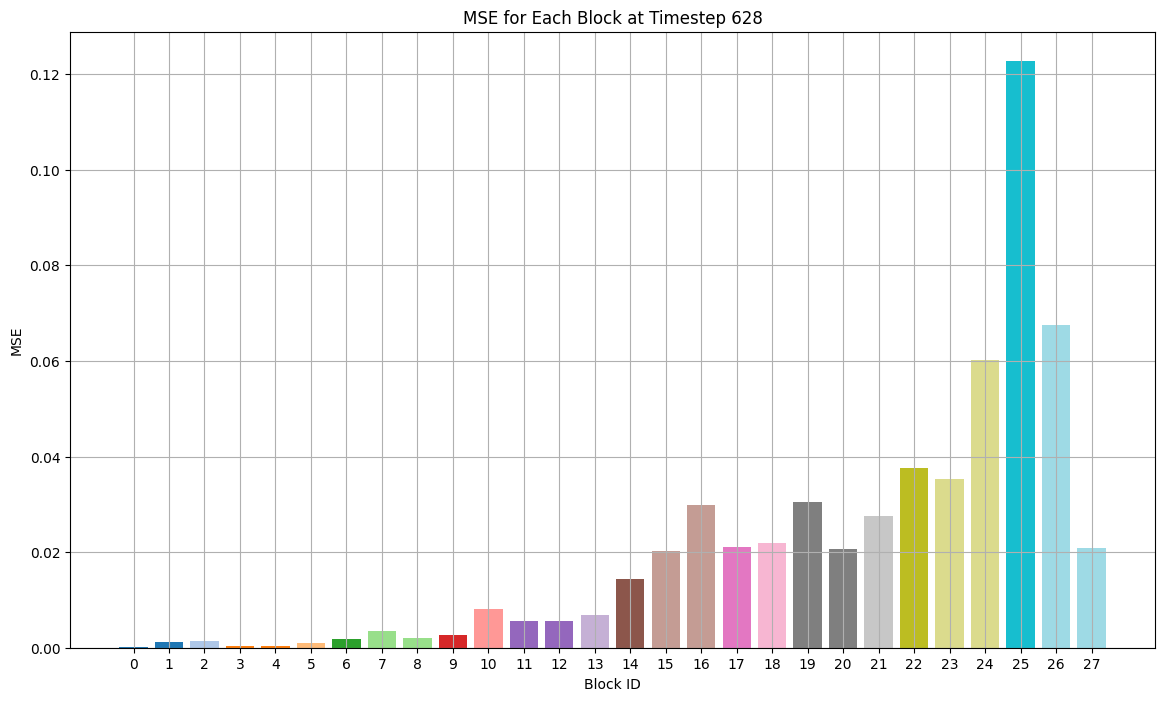

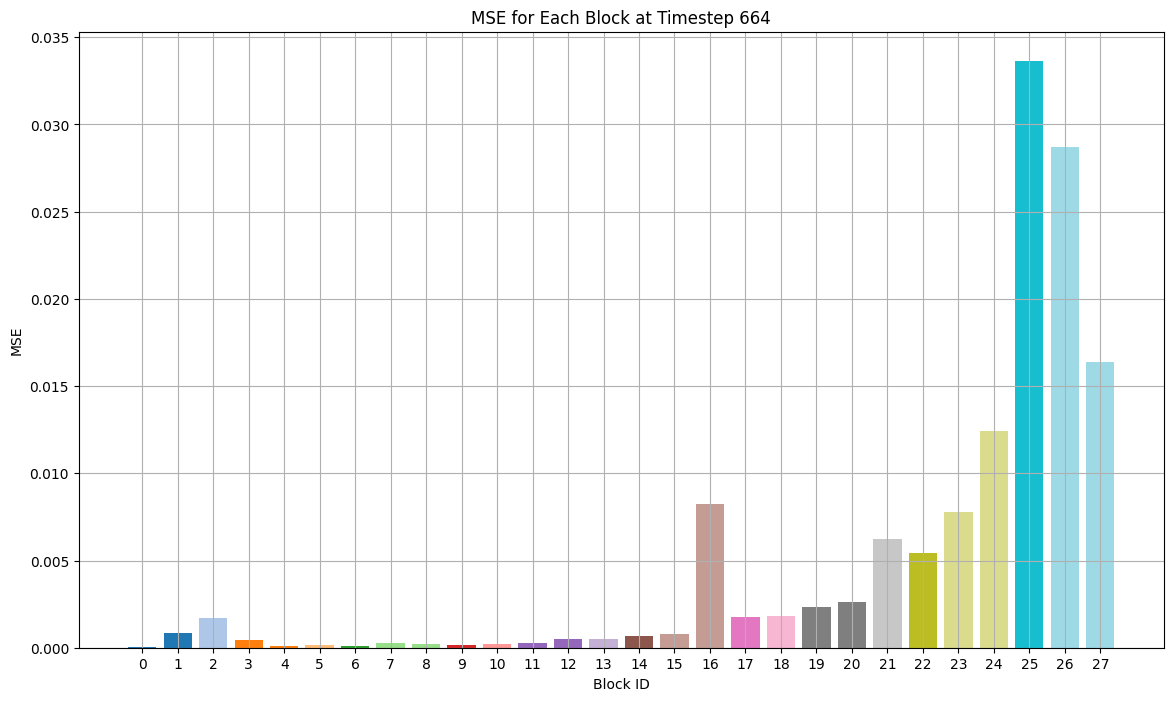

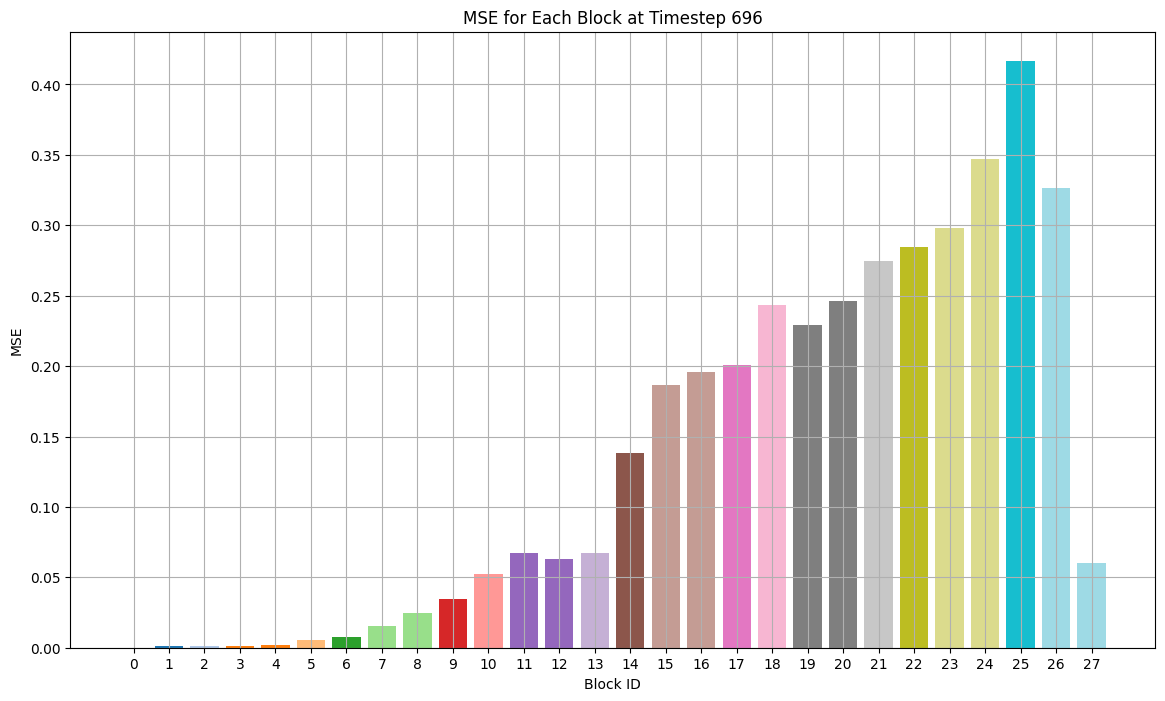

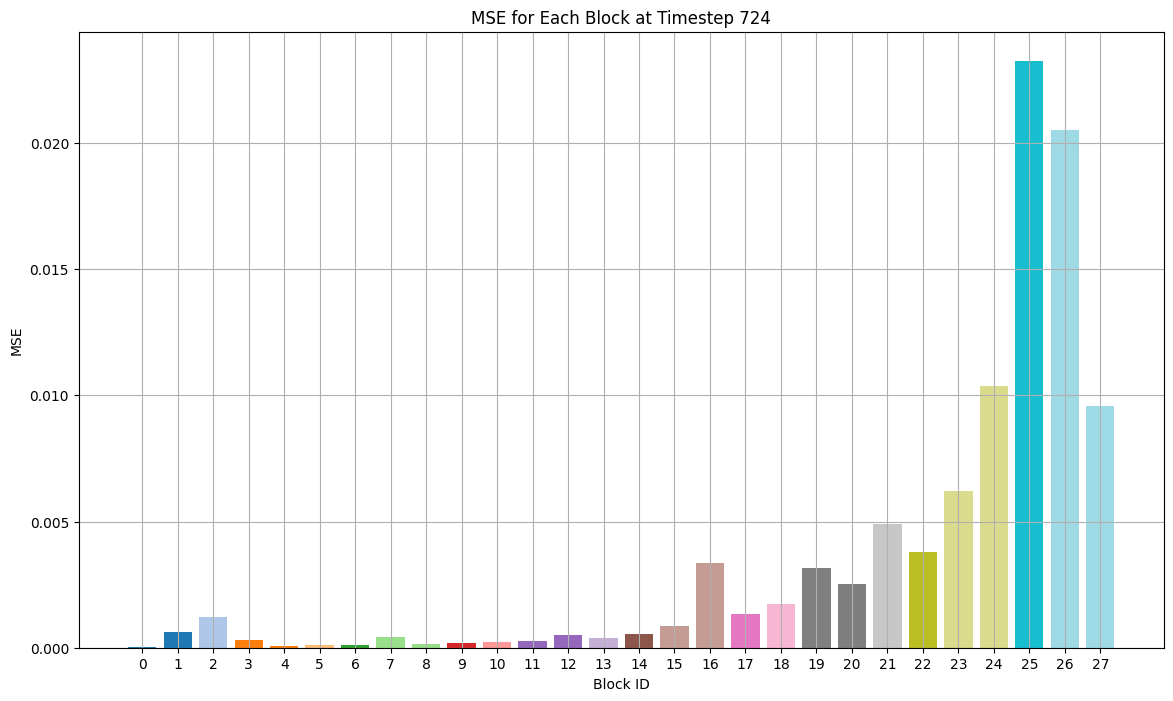

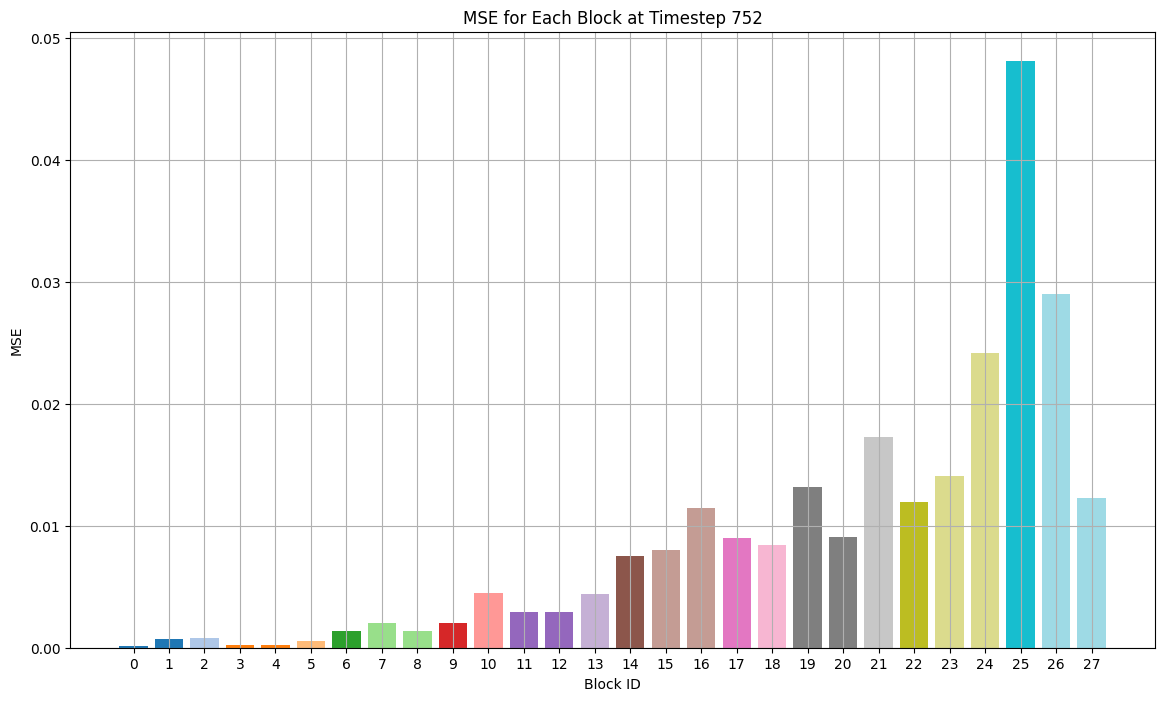

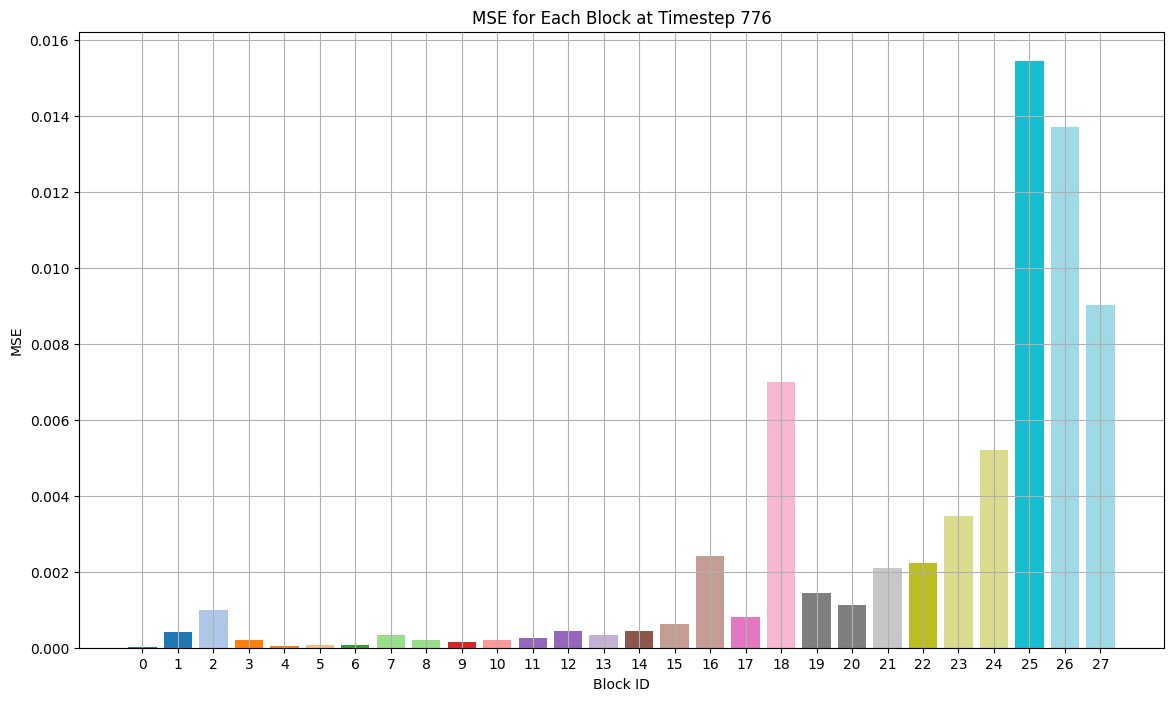

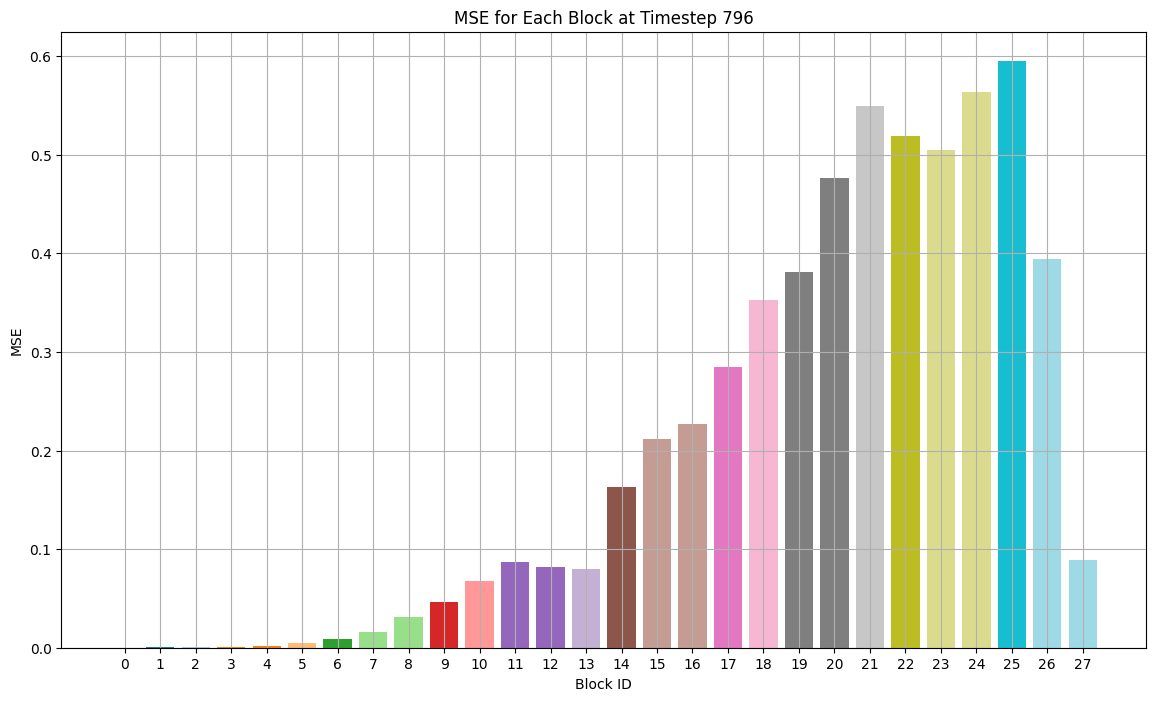

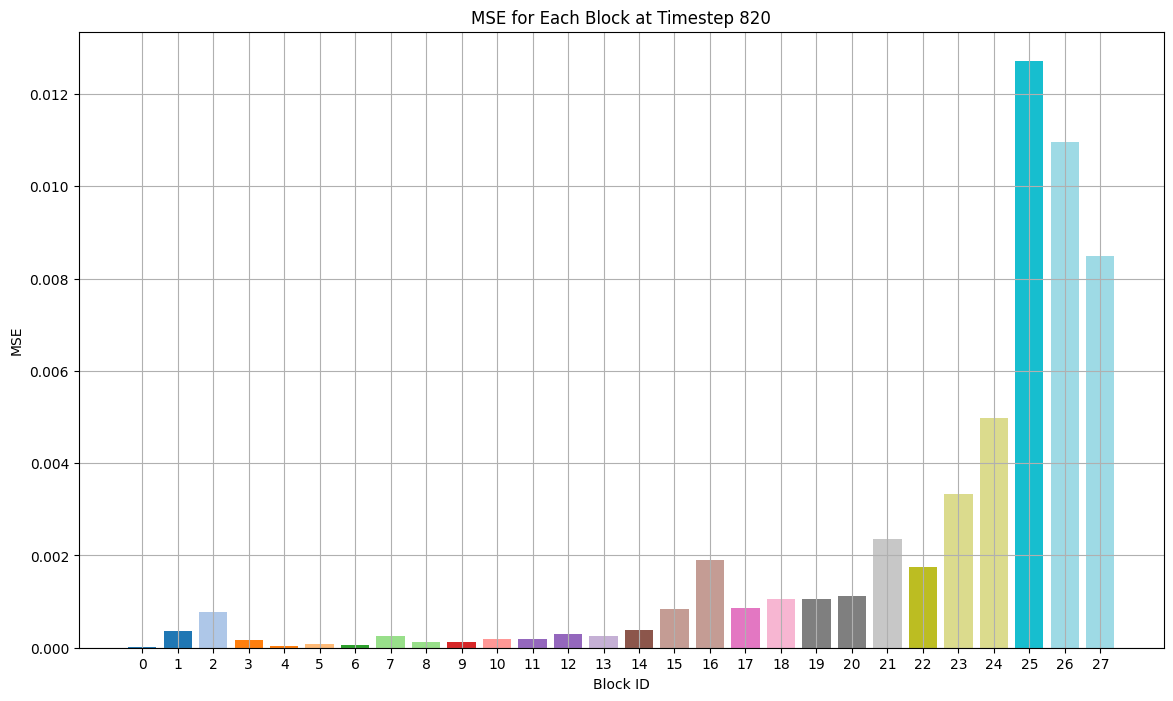

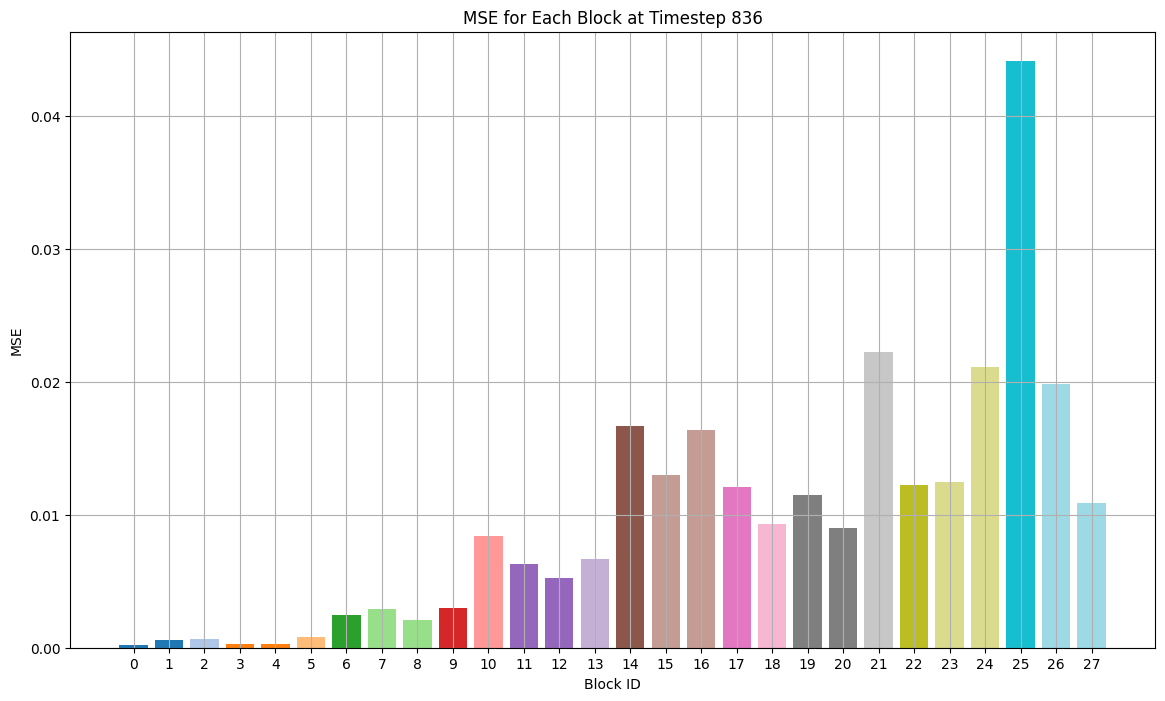

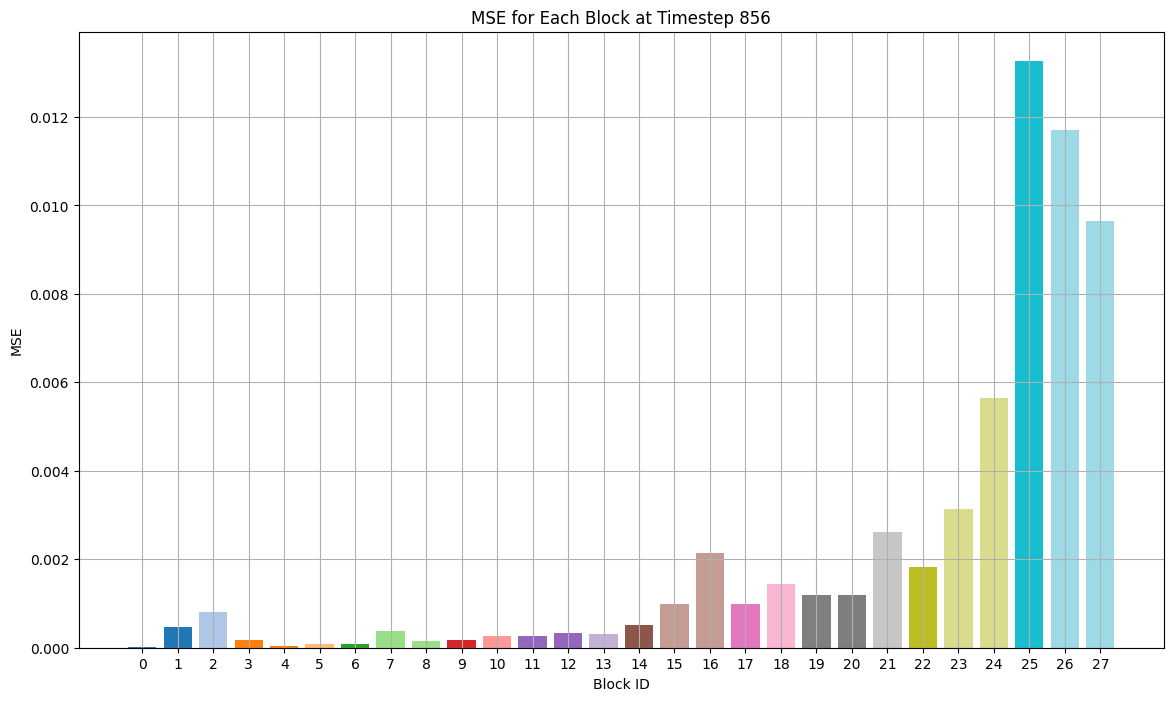

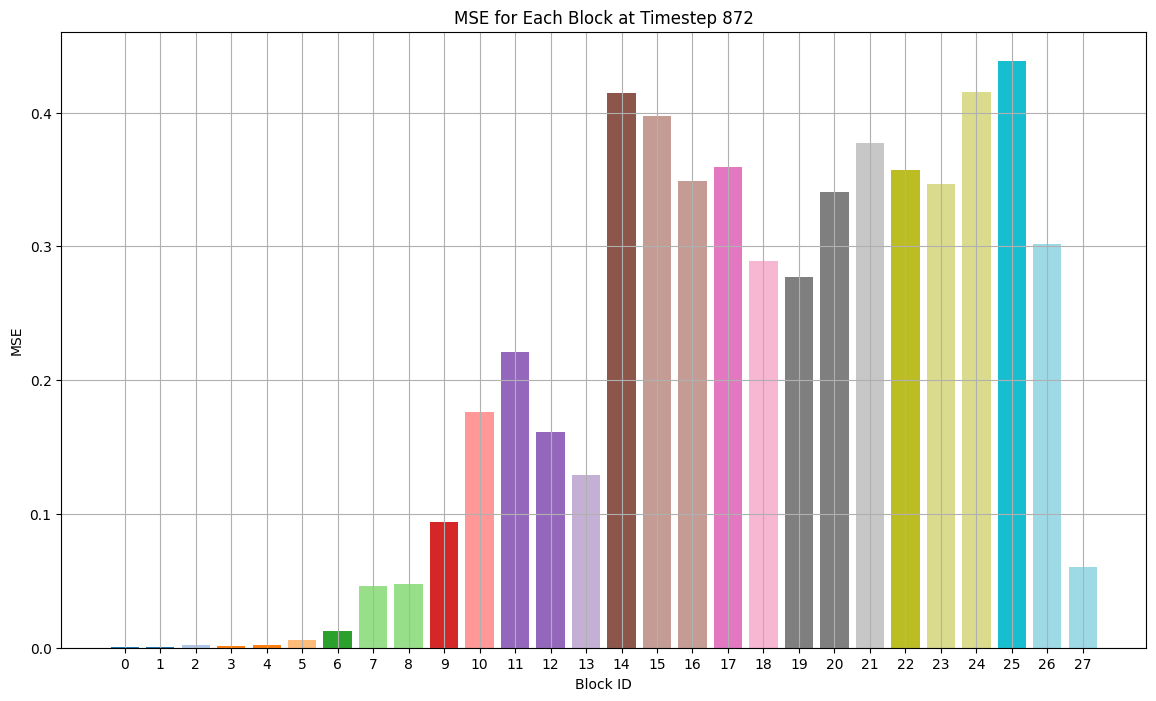

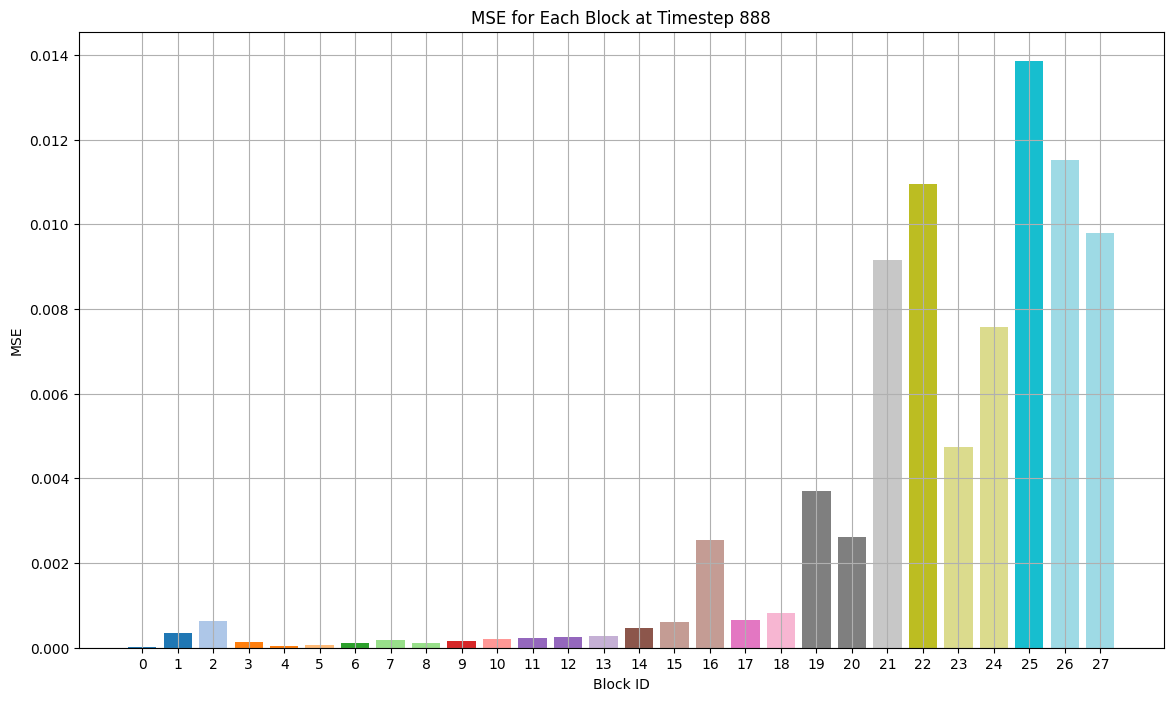

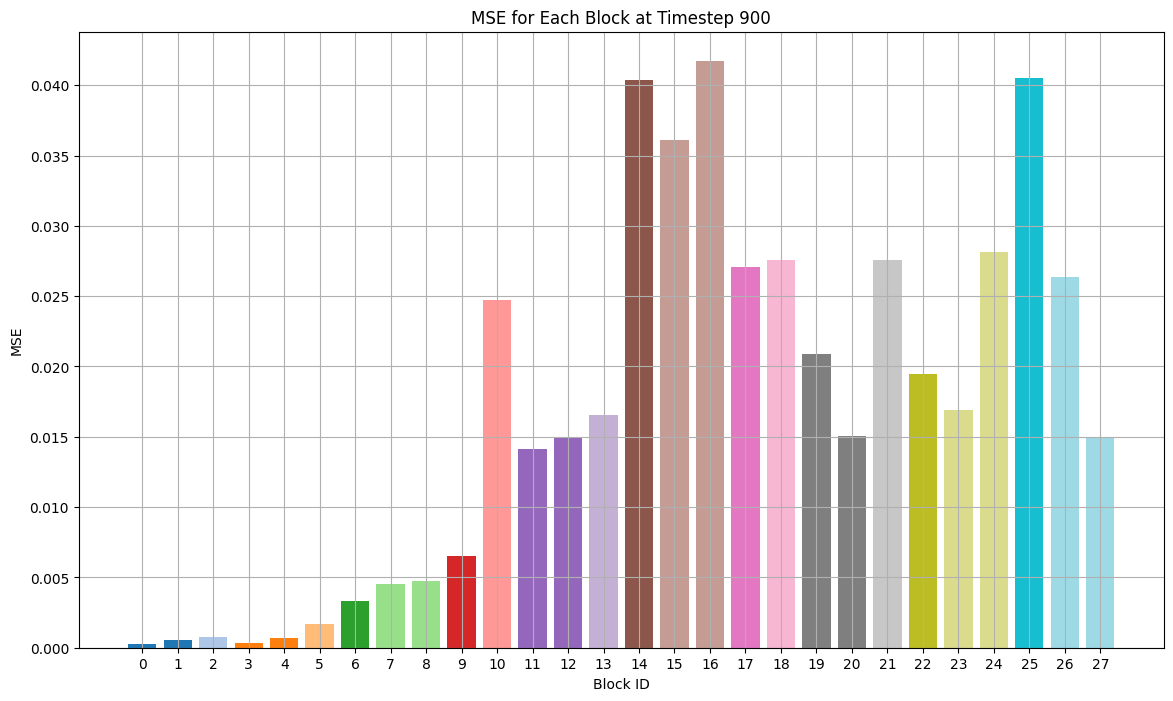

In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import collections

# Load the data
spatial_mlp_mse = torch.load('samples/opensora/A vibrant underwater scene. A group of b_spatial_mlp_mse.pt')

# Organize data by block and timestep
block_mse = collections.defaultdict(list)
timesteps = sorted(spatial_mlp_mse.keys())

for timestep in timesteps:
    for block_id, mse in spatial_mlp_mse[timestep]:
        block_mse[block_id].append((timestep, mse))

# Define different styles for better distinction
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H']
colors = plt.get_cmap('tab20', len(block_mse))

# Plot MSE for each block over time
plt.figure(figsize=(12, 8))
for idx, (block_id, mse_data) in enumerate(block_mse.items()):
    mse_data = sorted(mse_data)
    timesteps, mses = zip(*mse_data)
    plt.plot(timesteps, mses, label=f'Block {block_id}', linestyle=line_styles[idx % len(line_styles)],
            marker=markers[idx % len(markers)], color=colors(idx))

plt.xlabel('Timestep')
plt.ylabel('MSE')
plt.title('MSE for Each Block Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and plot average MSE over time
average_mse = []
for timestep in timesteps:
    mse_values = [mse for _, mse in spatial_mlp_mse[timestep]]
    average_mse.append(np.mean(mse_values))

plt.figure(figsize=(20, 8))
plt.plot(timesteps, average_mse, label='Average MSE', color='black', marker='o')
plt.xticks(timesteps)
plt.xlabel('Timestep')
plt.ylabel('Average MSE')
plt.title('Average MSE spatial Over Time')
plt.legend()
plt.grid(True)
plt.show()


all_timesteps = set()
plt.figure(figsize=(12, 8))
for idx, (block_id, mse_data) in enumerate(block_mse.items()):
    mse_data = sorted(mse_data)
    filtered_mse_data = [(t, mse) for t, mse in mse_data if 400 <= t <= 900]
    if filtered_mse_data:
        timesteps, mses = zip(*filtered_mse_data)
        all_timesteps.update(timesteps)  # Collecting all unique timesteps
        plt.plot(timesteps, mses, label=f'Block {block_id}', linestyle=line_styles[idx % len(line_styles)],
                marker=markers[idx % len(markers)], color=colors(idx))

plt.xlabel('Timestep')
plt.ylabel('MSE')
plt.title('MSE for Each Block Over Time (Timesteps 400-900)')
plt.legend()
plt.grid(True)

# Set x-ticks to be the unique timesteps
plt.xticks(sorted(all_timesteps))

plt.show()
# Plot bar charts of MSE for each block at specific timesteps between 400 and 900
timesteps_set = set(t for block_data in block_mse.values() for t, mse in block_data if 400 <= t <= 900)
timesteps_sorted = sorted(timesteps_set)
for timestep in timesteps_sorted:
    mses_at_timestep = [(block_id, mse) for block_id, mse_data in block_mse.items()
                        for t, mse in mse_data if t == timestep]
    if mses_at_timestep:
        block_ids, mses = zip(*mses_at_timestep)
        x = np.arange(len(block_ids))
        plt.figure(figsize=(14, 8))
        plt.bar(x, mses, color=[colors(i) for i in range(len(block_ids))])
        plt.xlabel('Block ID')
        plt.ylabel('MSE')
        plt.title(f'MSE for Each Block at Timestep {timestep}')
        plt.xticks(x, [f'{block_id}' for block_id in block_ids])
        plt.grid(True)
        plt.show()


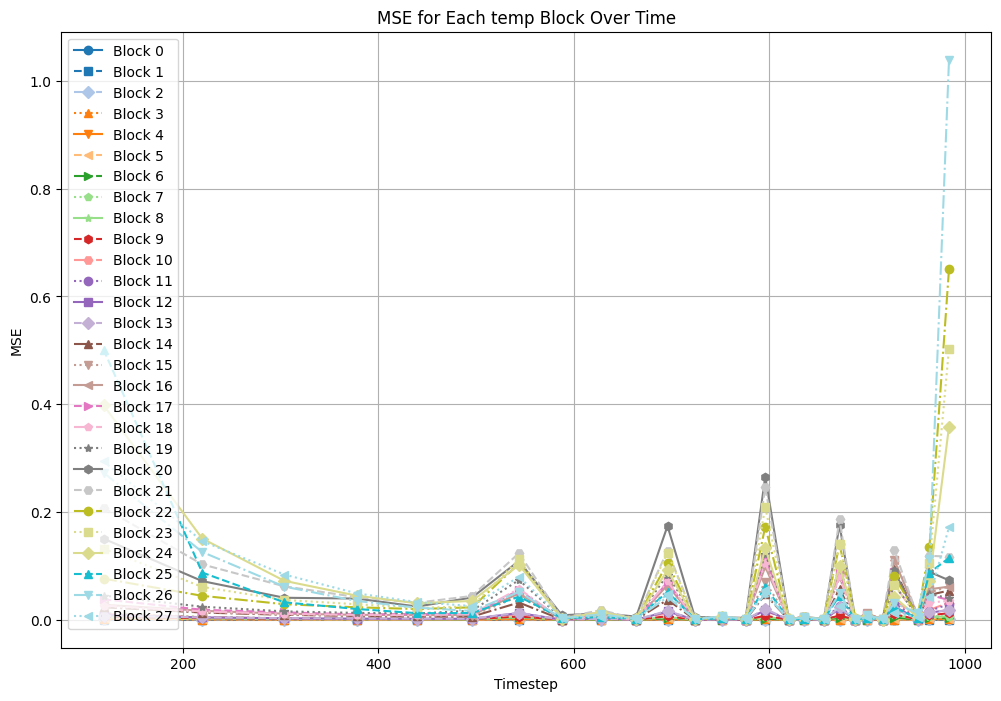

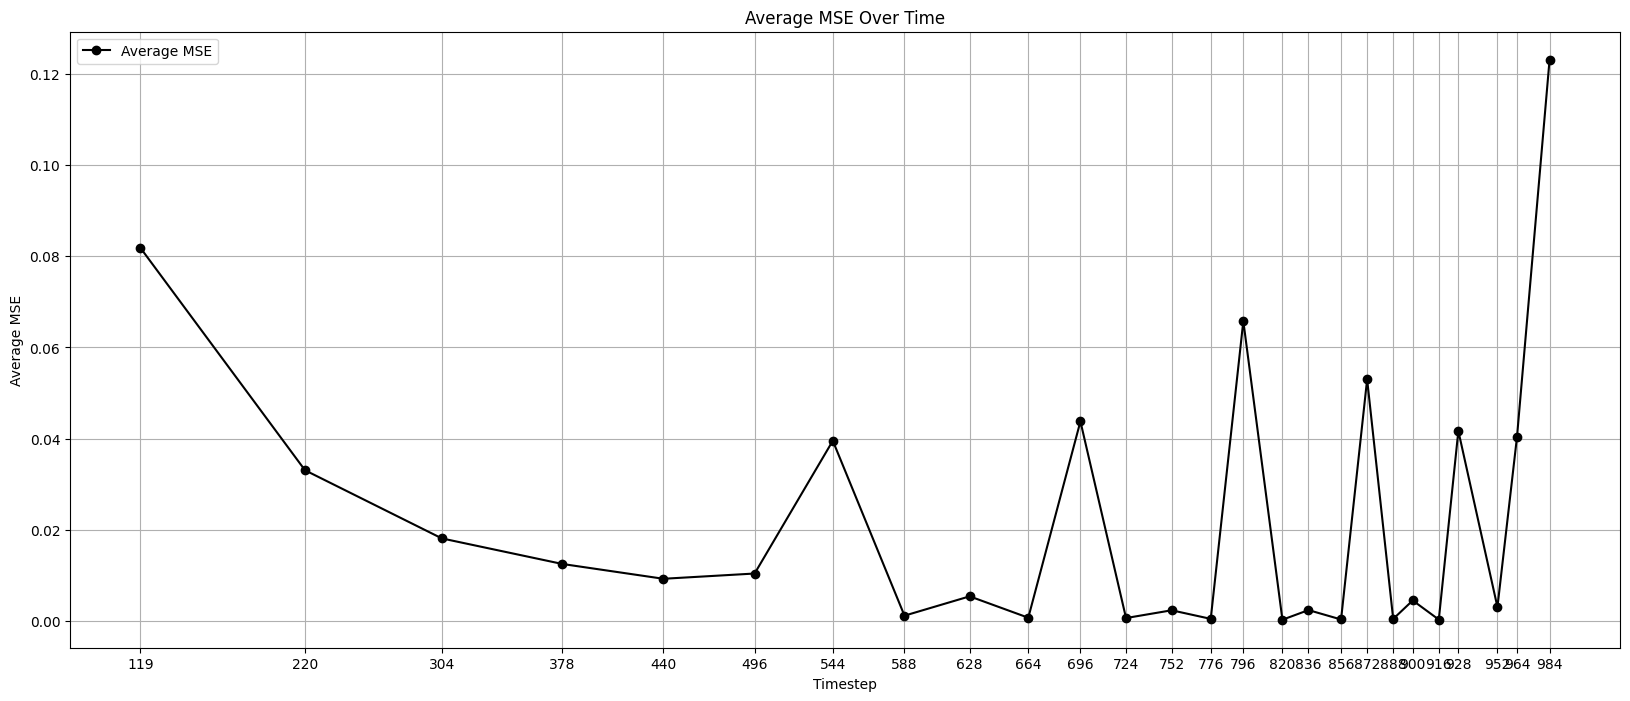

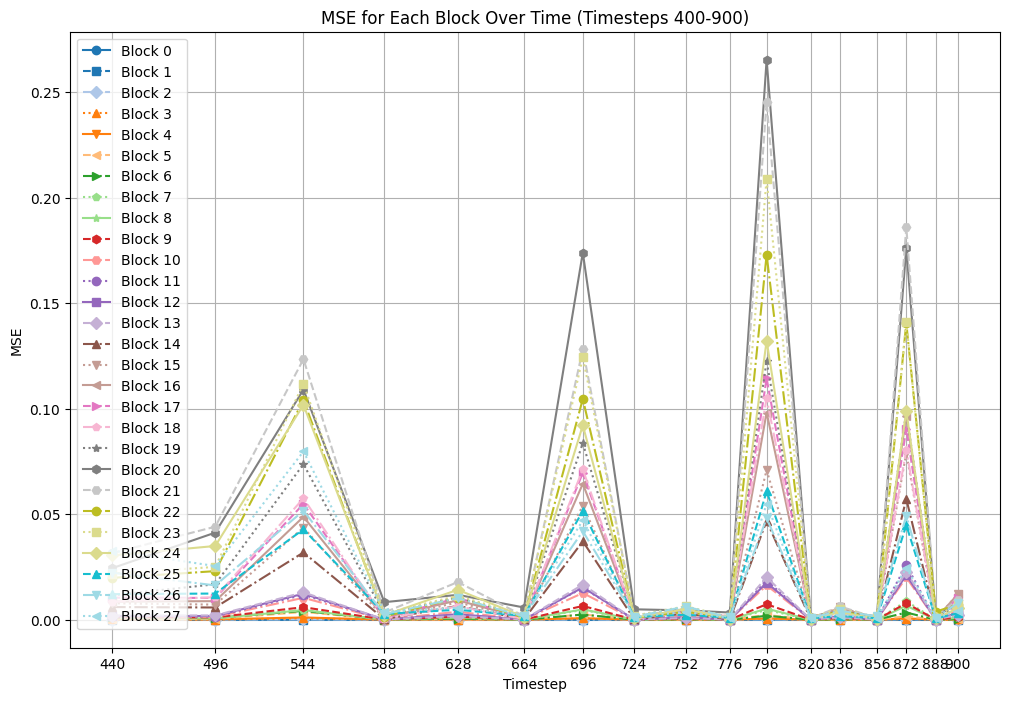

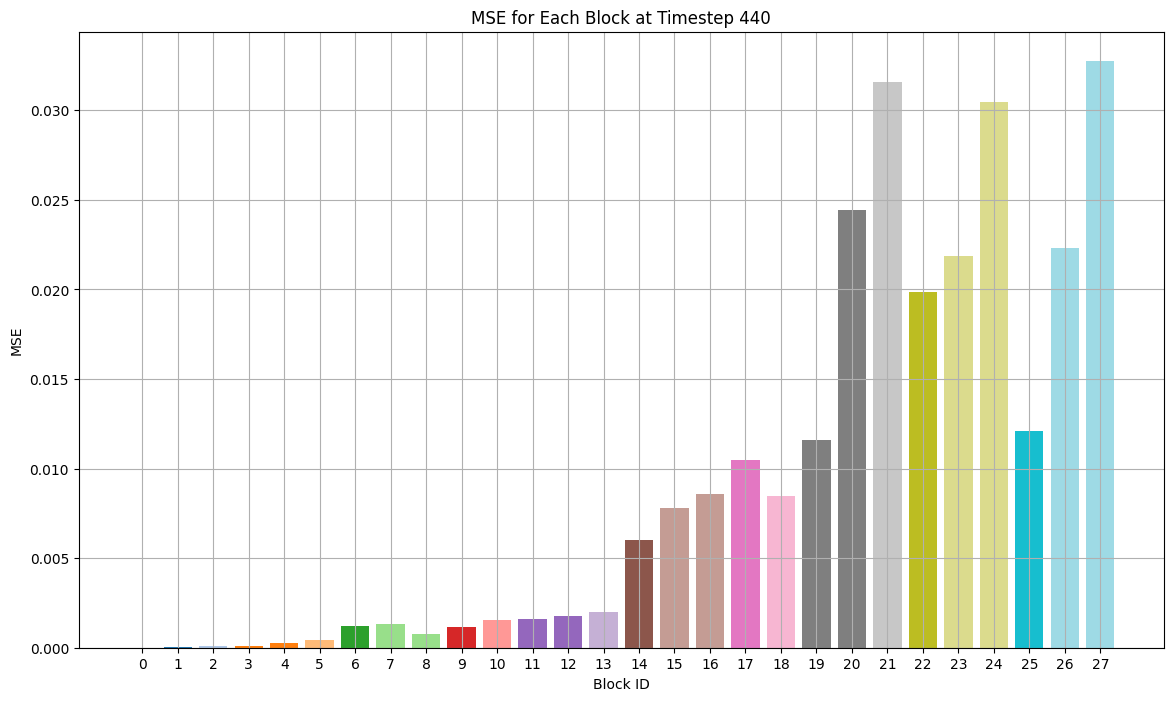

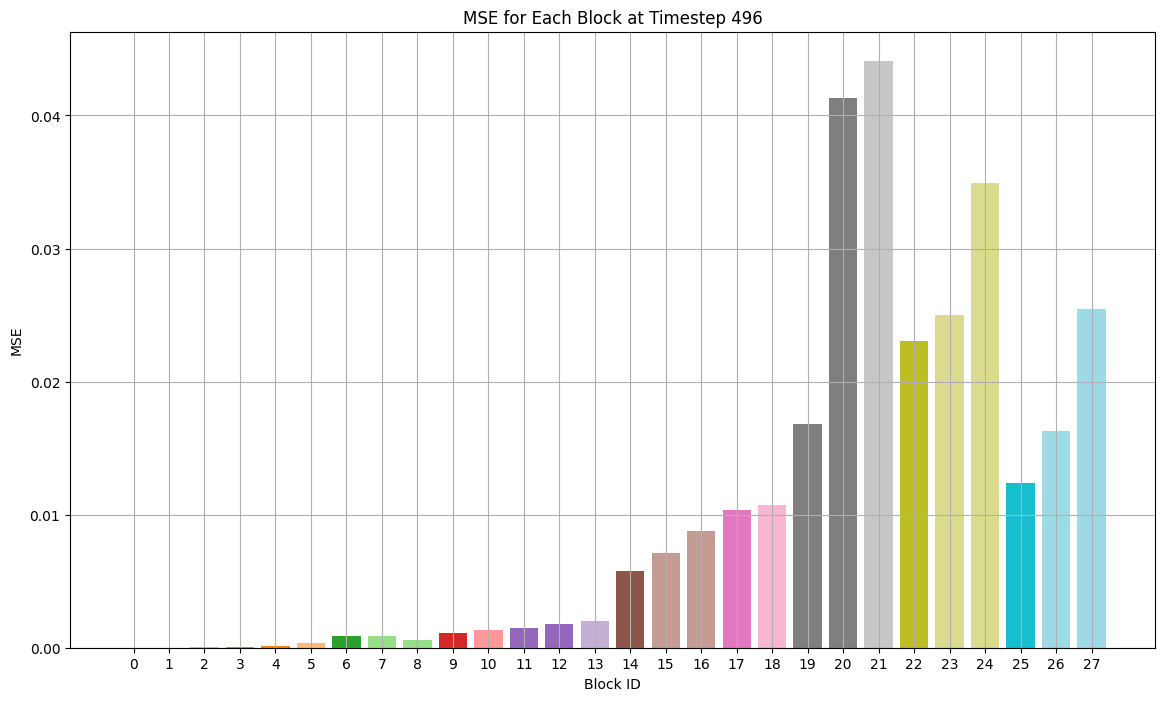

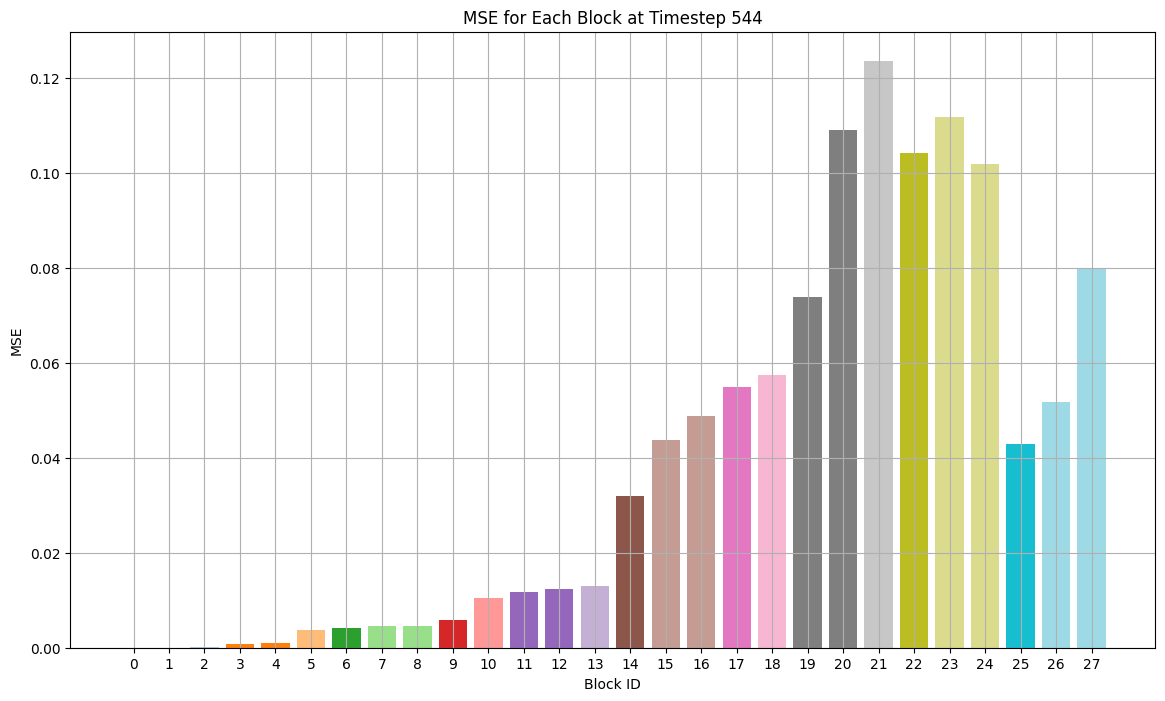

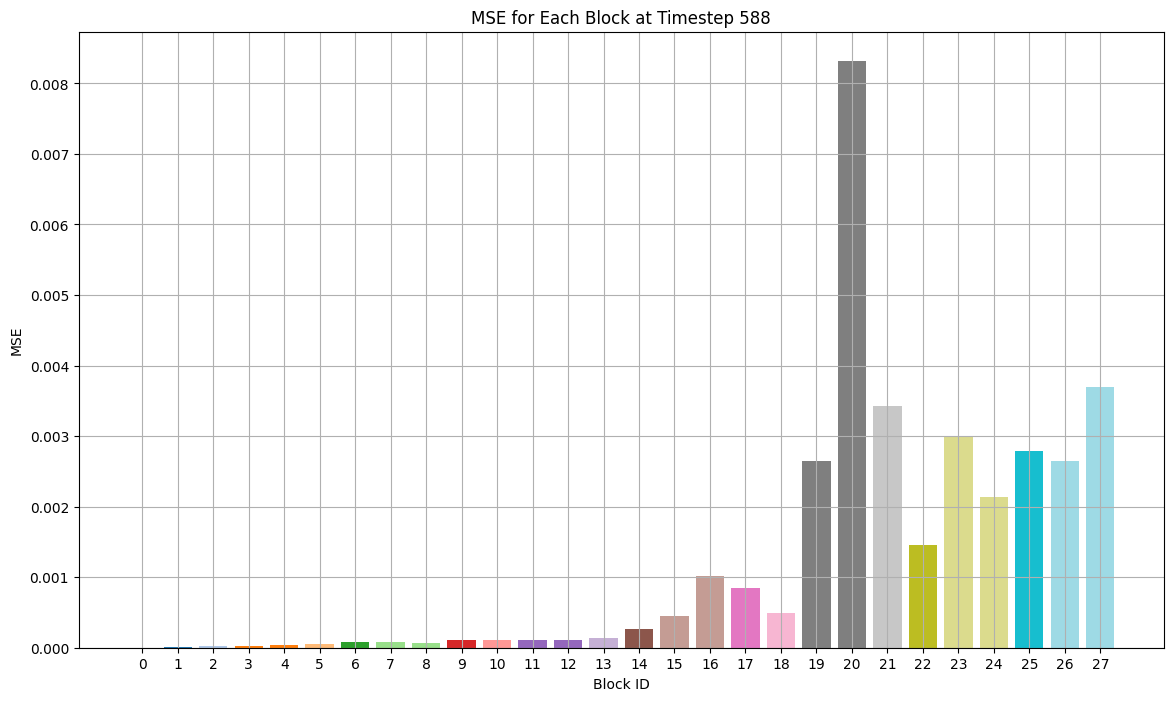

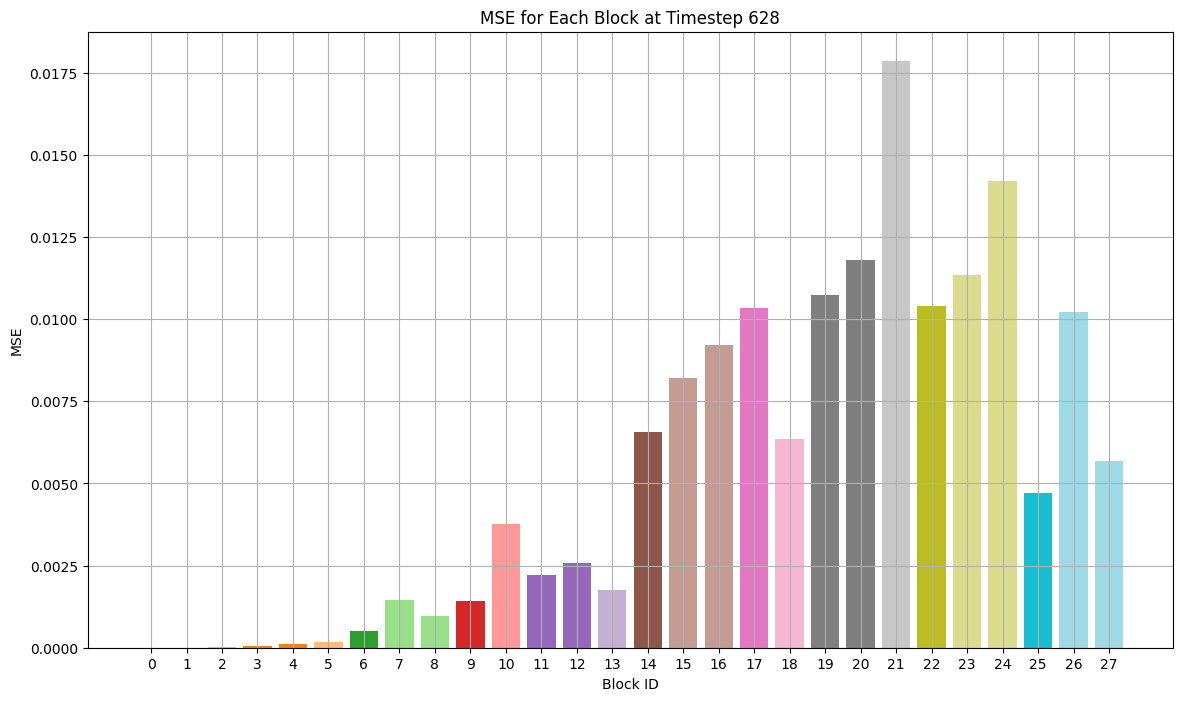

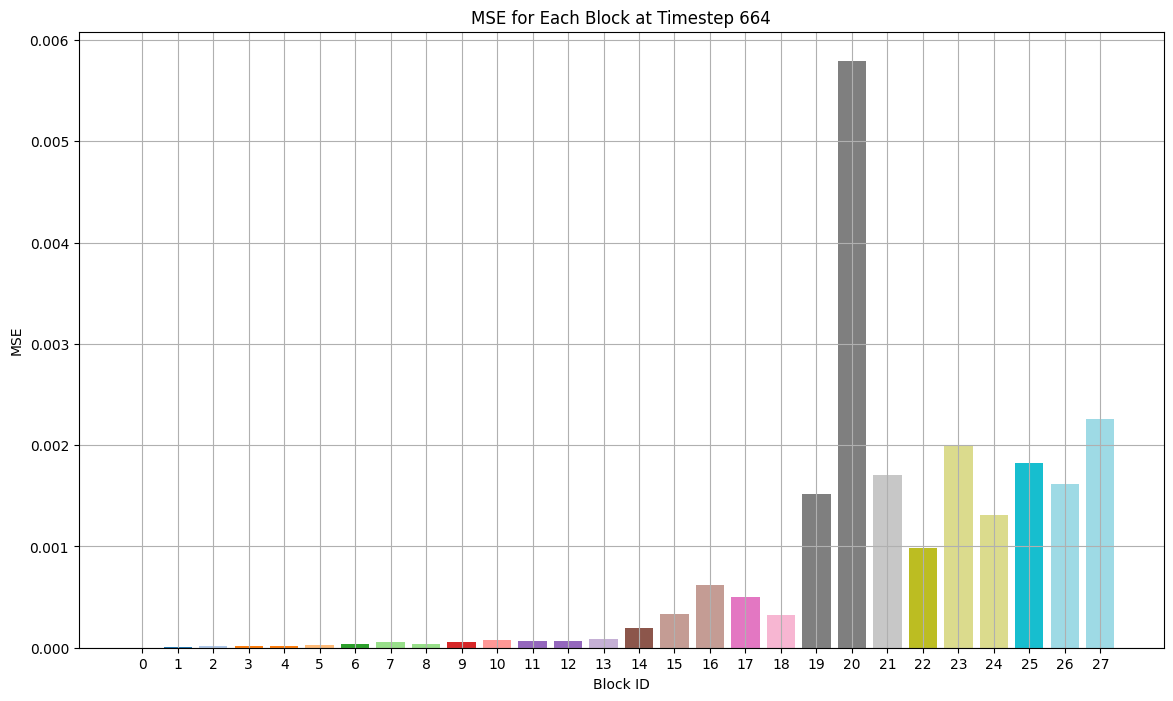

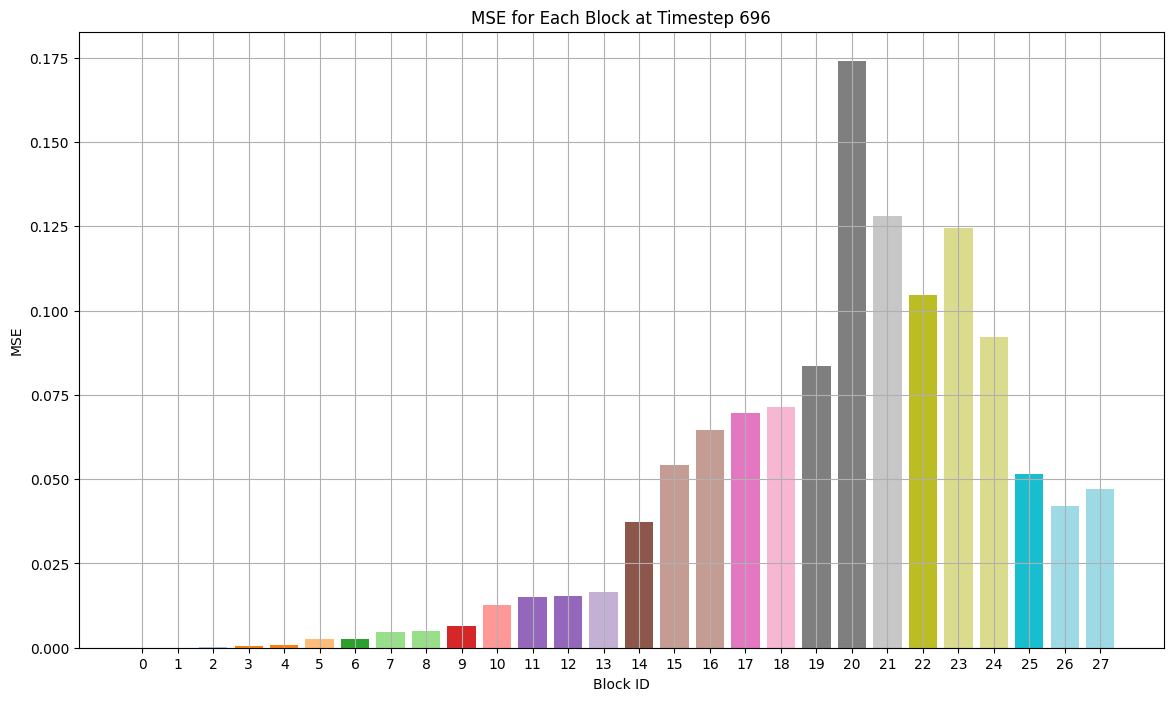

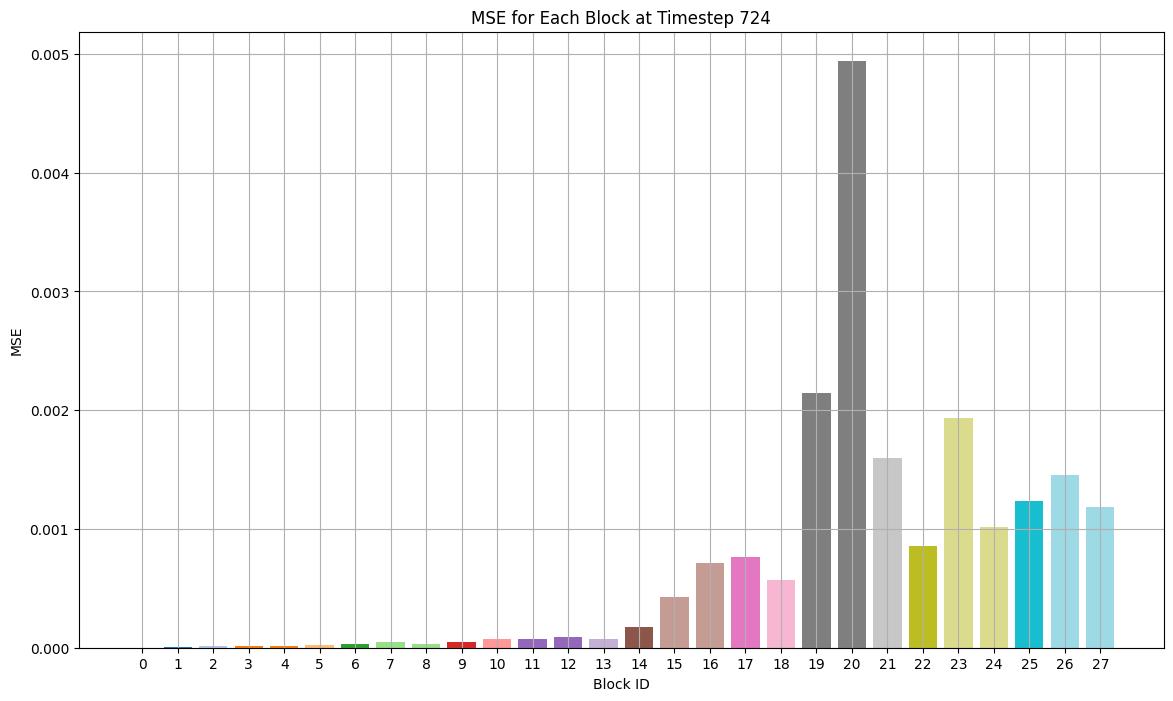

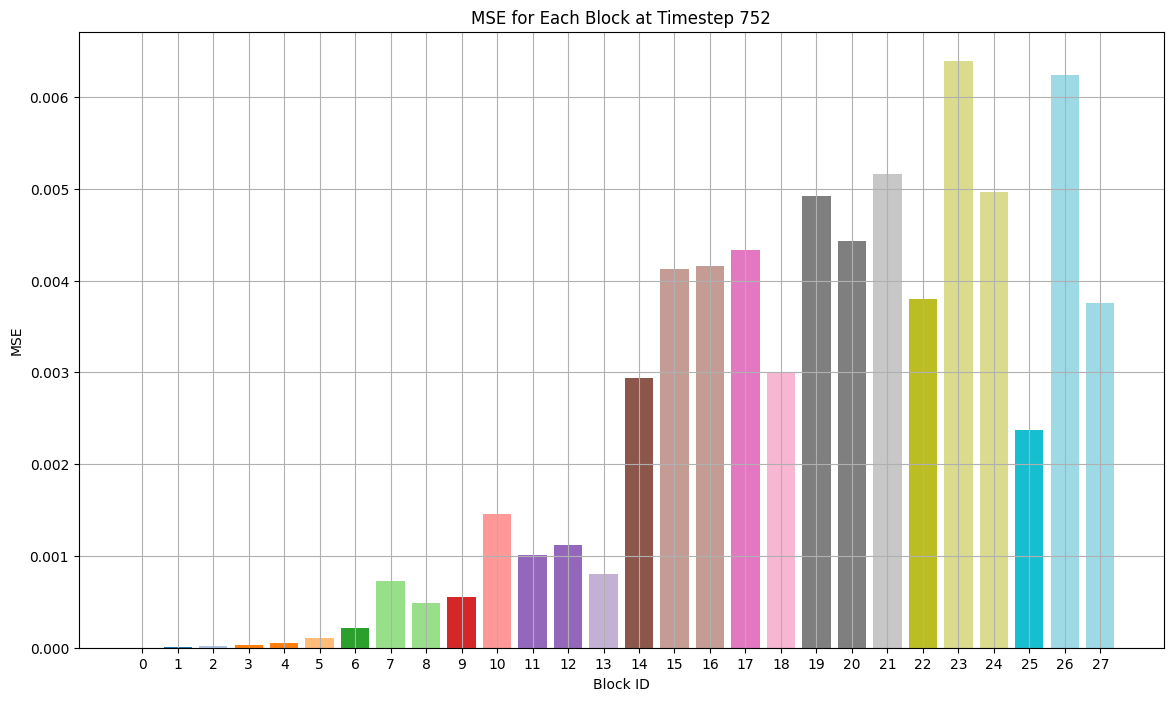

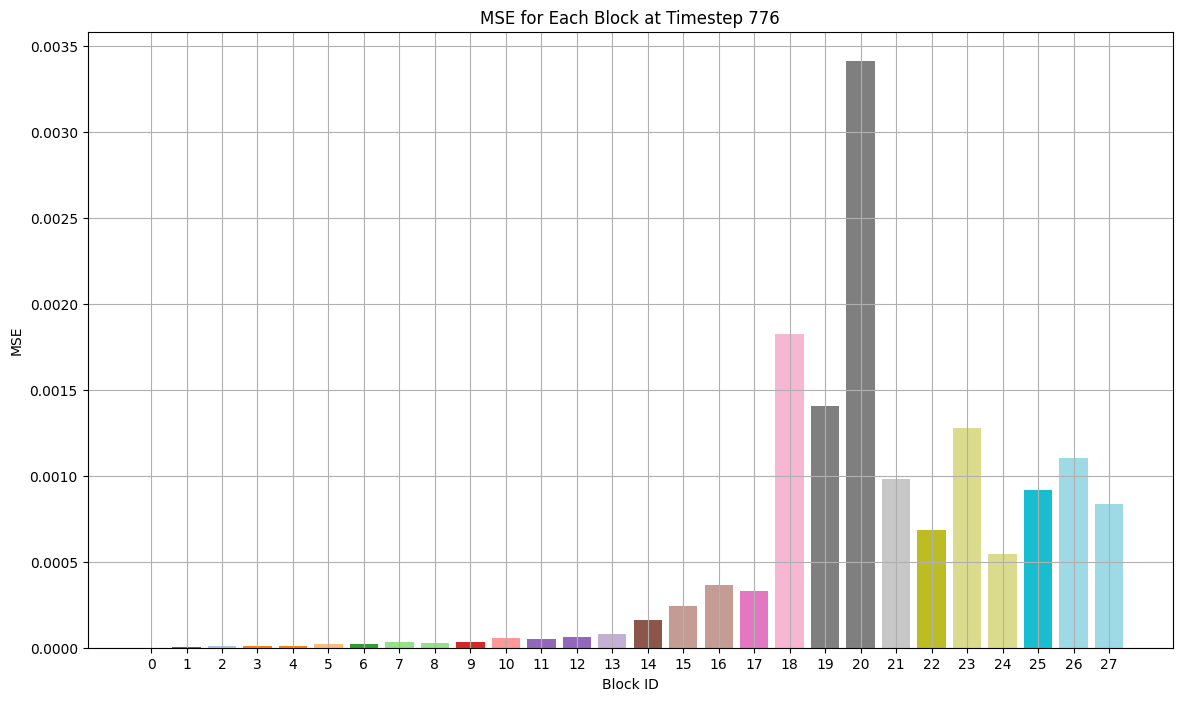

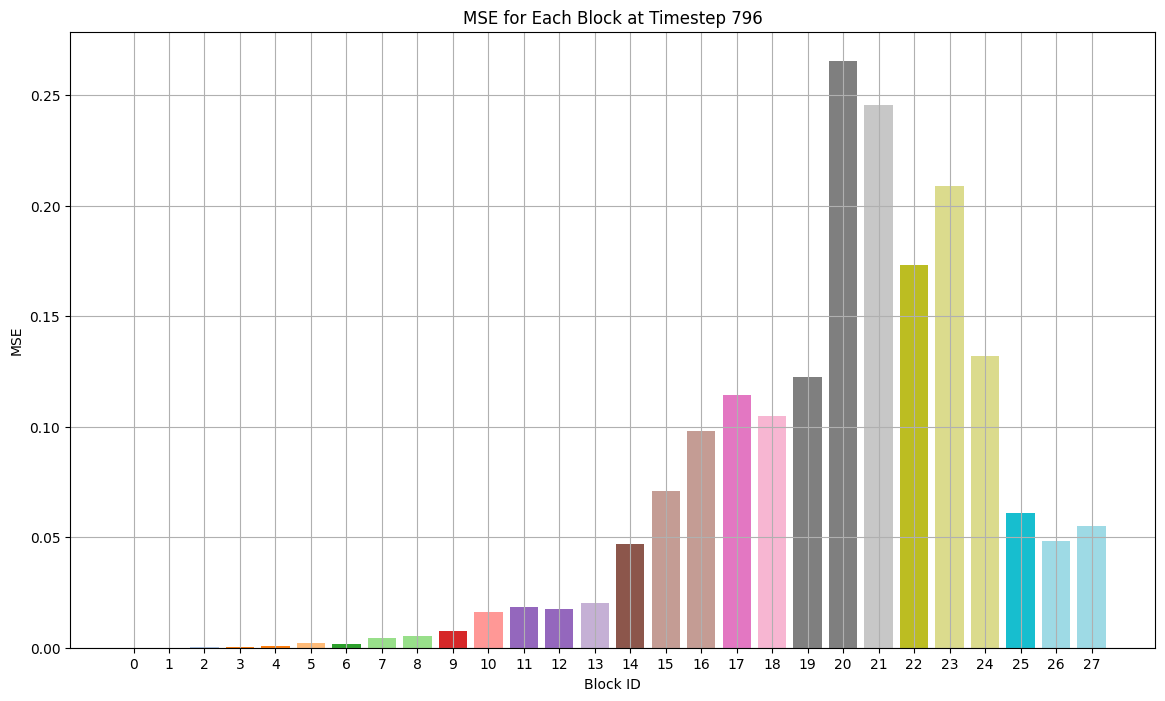

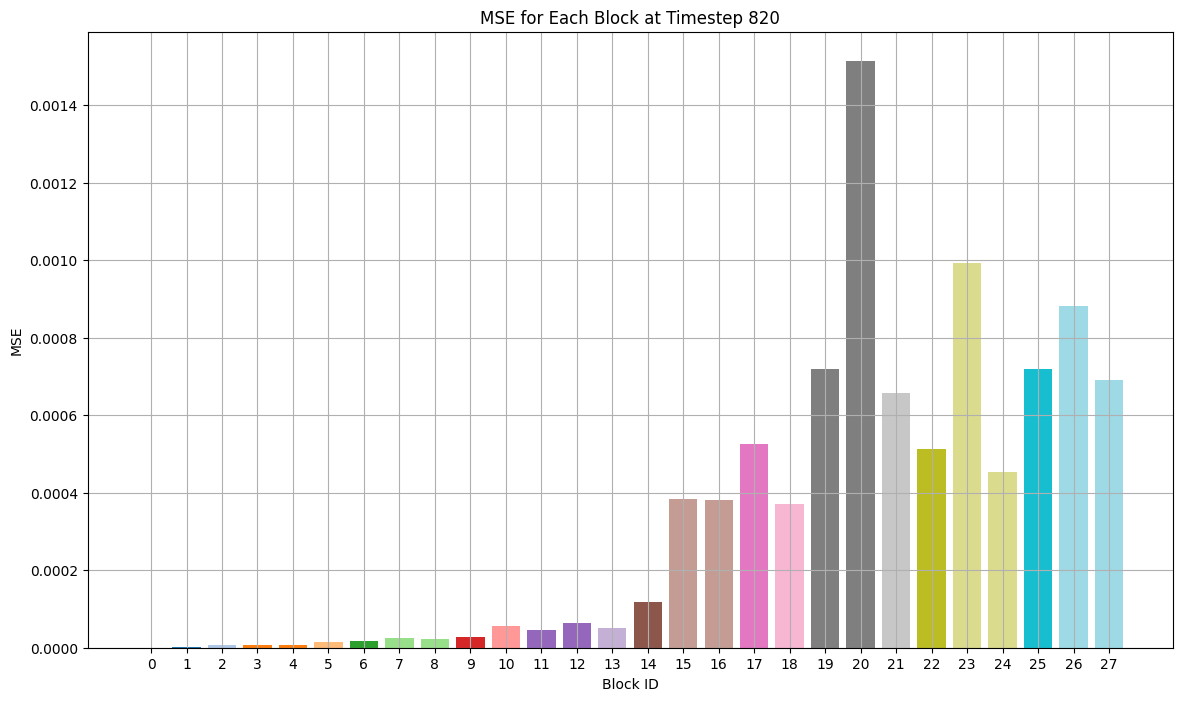

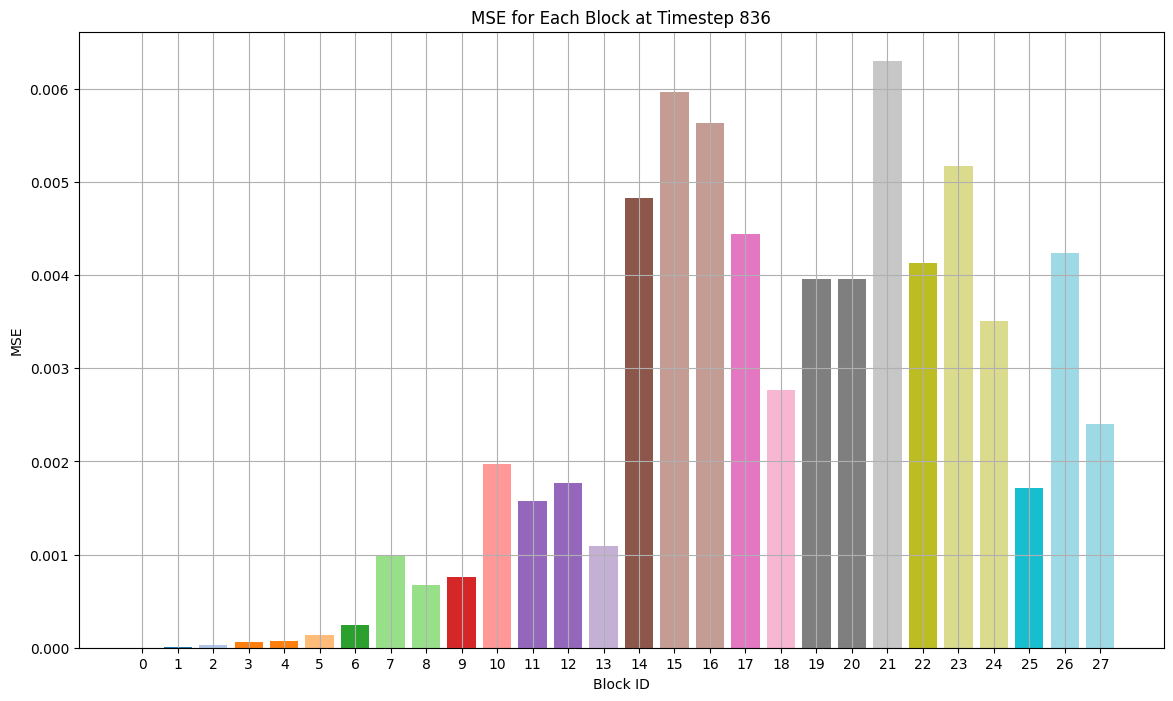

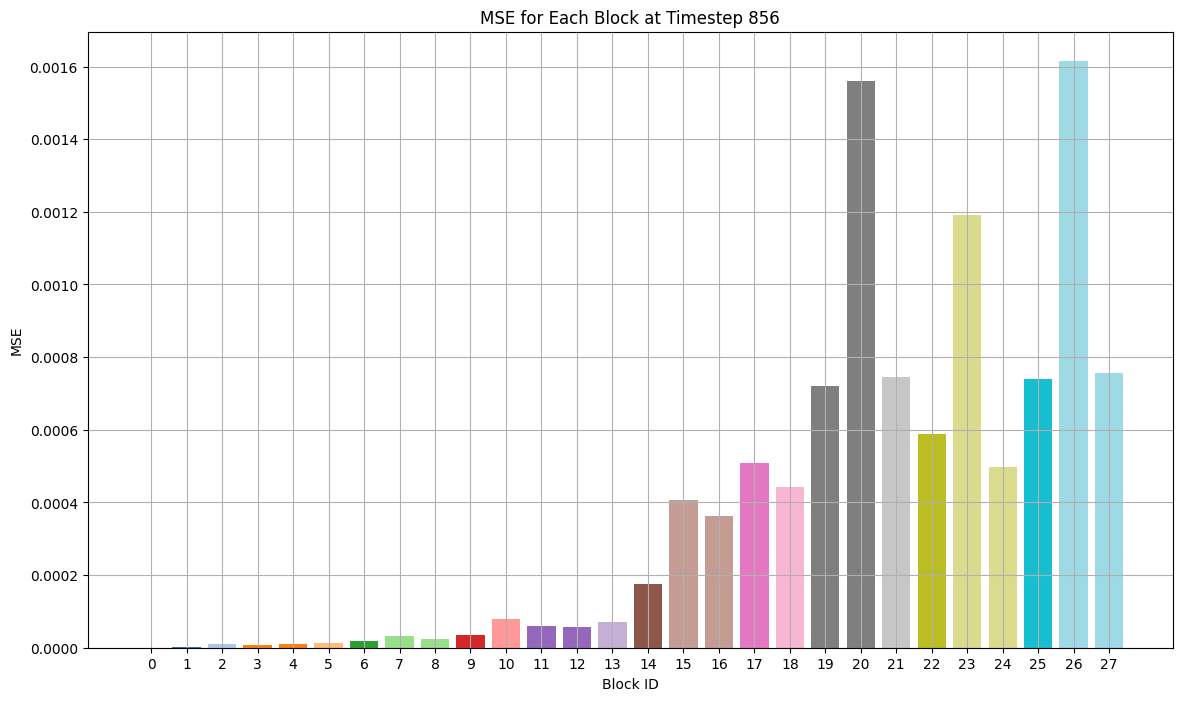

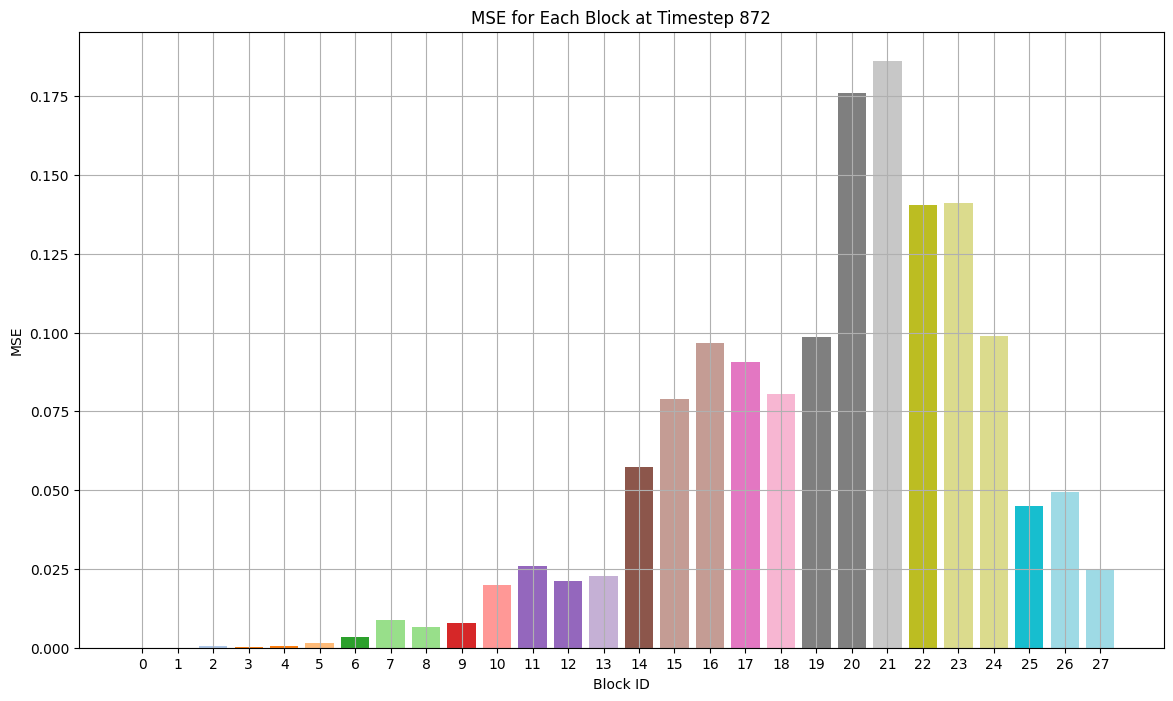

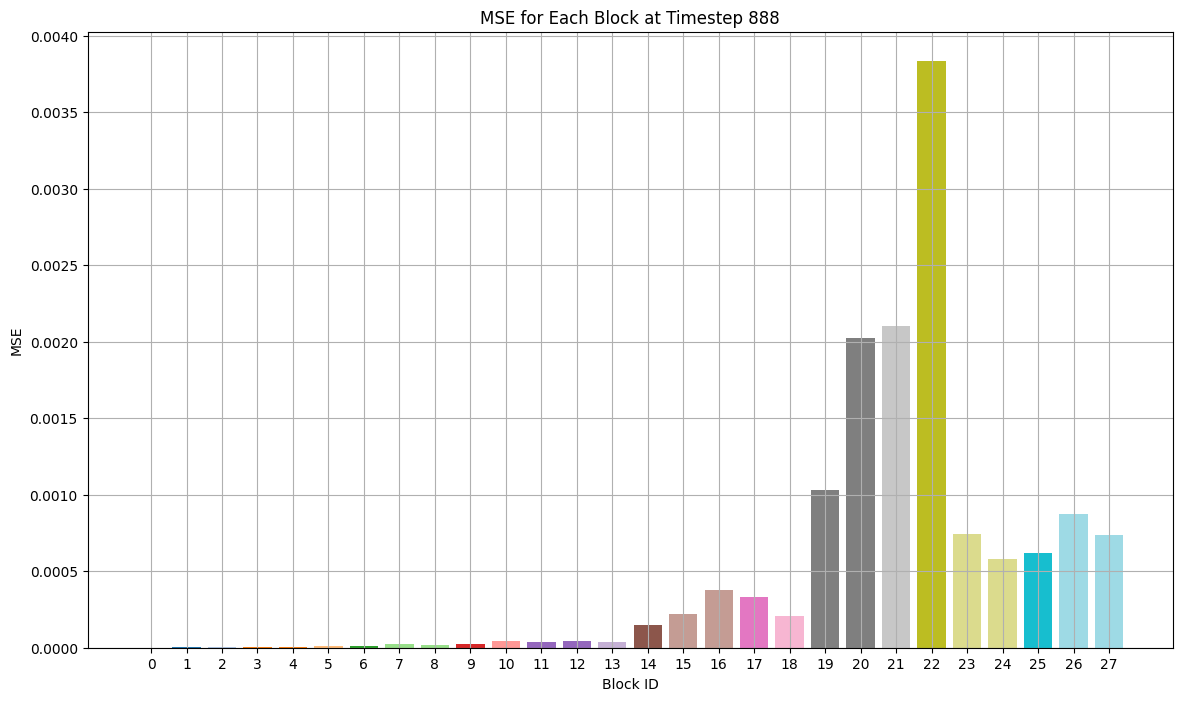

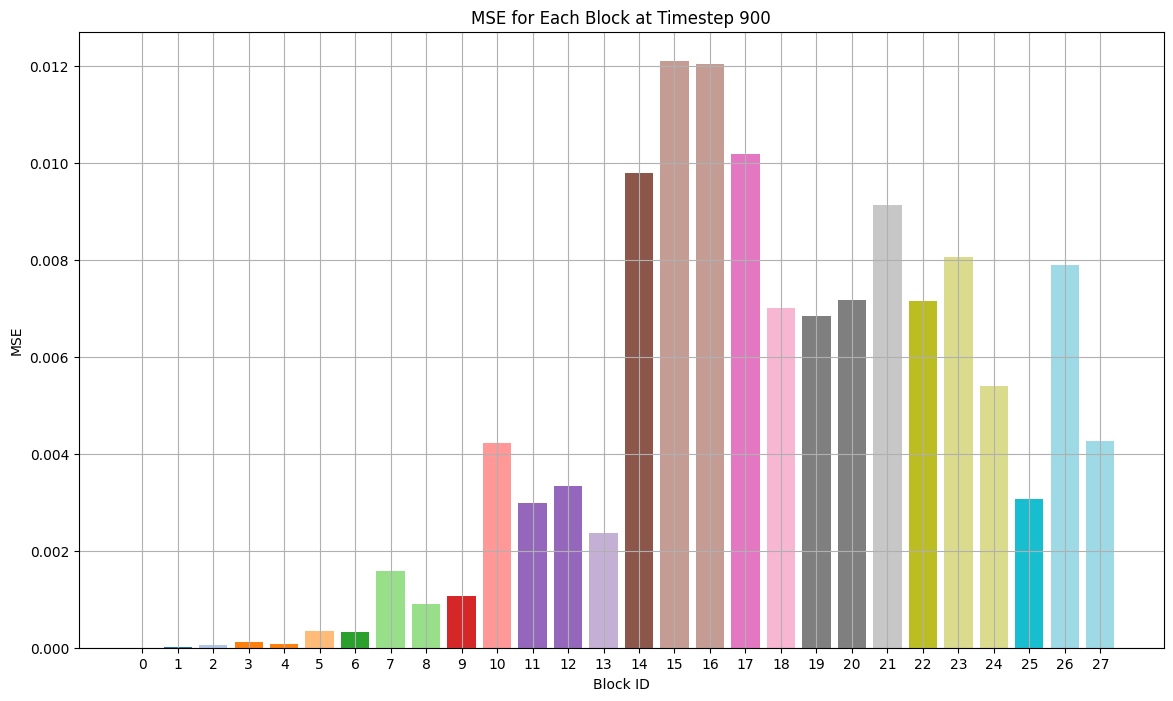

In [4]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import collections

# Load the data
spatial_mlp_mse = torch.load('samples/opensora/A vibrant underwater scene. A group of b_temporal_mlp_mse.pt')

# Organize data by block and timestep
block_mse = collections.defaultdict(list)
timesteps = sorted(spatial_mlp_mse.keys())

for timestep in timesteps:
    for block_id, mse in spatial_mlp_mse[timestep]:
        block_mse[block_id].append((timestep, mse))

# Define different styles for better distinction
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H']
colors = plt.get_cmap('tab20', len(block_mse))

# Plot MSE for each block over time
plt.figure(figsize=(12, 8))
for idx, (block_id, mse_data) in enumerate(block_mse.items()):
    mse_data = sorted(mse_data)
    timesteps, mses = zip(*mse_data)
    plt.plot(timesteps, mses, label=f'Block {block_id}', linestyle=line_styles[idx % len(line_styles)],
            marker=markers[idx % len(markers)], color=colors(idx))

plt.xlabel('Timestep')
plt.ylabel('MSE')
plt.title('MSE for Each temp Block Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and plot average MSE over time
average_mse = []
for timestep in timesteps:
    mse_values = [mse for _, mse in spatial_mlp_mse[timestep]]
    average_mse.append(np.mean(mse_values))

plt.figure(figsize=(20, 8))
plt.plot(timesteps, average_mse, label='Average MSE', color='black', marker='o')
plt.xticks(timesteps)
plt.xlabel('Timestep')
plt.ylabel('Average MSE')
plt.title('Average MSE Over Time')
plt.legend()
plt.grid(True)
plt.show()


all_timesteps = set()
plt.figure(figsize=(12, 8))
for idx, (block_id, mse_data) in enumerate(block_mse.items()):
    mse_data = sorted(mse_data)
    filtered_mse_data = [(t, mse) for t, mse in mse_data if 400 <= t <= 900]
    if filtered_mse_data:
        timesteps, mses = zip(*filtered_mse_data)
        all_timesteps.update(timesteps)  # Collecting all unique timesteps
        plt.plot(timesteps, mses, label=f'Block {block_id}', linestyle=line_styles[idx % len(line_styles)],
                marker=markers[idx % len(markers)], color=colors(idx))

plt.xlabel('Timestep')
plt.ylabel('MSE')
plt.title('MSE for Each Block Over Time (Timesteps 400-900)')
plt.legend()
plt.grid(True)

# Set x-ticks to be the unique timesteps
plt.xticks(sorted(all_timesteps))

plt.show()
# Plot bar charts of MSE for each block at specific timesteps between 400 and 900
timesteps_set = set(t for block_data in block_mse.values() for t, mse in block_data if 400 <= t <= 900)
timesteps_sorted = sorted(timesteps_set)
for timestep in timesteps_sorted:
    mses_at_timestep = [(block_id, mse) for block_id, mse_data in block_mse.items()
                        for t, mse in mse_data if t == timestep]
    if mses_at_timestep:
        block_ids, mses = zip(*mses_at_timestep)
        x = np.arange(len(block_ids))
        plt.figure(figsize=(14, 8))
        plt.bar(x, mses, color=[colors(i) for i in range(len(block_ids))])
        plt.xlabel('Block ID')
        plt.ylabel('MSE')
        plt.title(f'MSE for Each Block at Timestep {timestep}')
        plt.xticks(x, [f'{block_id}' for block_id in block_ids])
        plt.grid(True)
        plt.show()
